In [6]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [7]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

def compare_coefficients_and_importances_with_r2(
    linear_coefs_df,
    nonlinear_importances_df,
    linear_metrics_df,
    nonlinear_metrics_df,
    top_n=10
):
    results = []

    # Ensure index
    if 'Variable' in linear_coefs_df.columns:
        linear_coefs_df = linear_coefs_df.set_index('Variable')

    targets = nonlinear_importances_df['Target'].unique()

    for target in targets:
        if target not in linear_coefs_df.columns:
            continue

        # Coefficients
        coefs = linear_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index
        top_coef_values = coefs[top_coef_vars].values  # keep original signs

        # Importances
        imp_target = nonlinear_importances_df[nonlinear_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_linear_val = linear_metrics_df.loc[linear_metrics_df['Gasto'] == target, 'R²']
        r2_linear_str = f"{r2_linear_val.values[0]:.3f}" if not r2_linear_val.empty else "N/A"

        r2_nonlinear_val = nonlinear_metrics_df.loc[nonlinear_metrics_df['Target'] == target, 'R2']
        r2_nonlinear_str = f"{r2_nonlinear_val.values[0]:.3f}" if not r2_nonlinear_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Colors for coefficients: red if positive, blue if negative
        coef_colors = ['red' if v > 0 else 'blue' for v in top_coef_values]

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=coef_colors
        )
        axs[0].set_title(f'|Coef| - {target}\nR² linear = {r2_linear_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Absolute Coefficient Value')

        # Colors for importances: all black
        imp_colors = ['black'] * len(top_imp_vars)

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=imp_colors
        )
        axs[1].set_title(f'Importance - {target}\nR² nonlinear = {r2_nonlinear_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Model Importance')

        plt.suptitle(f'Comparison: Coefficients vs Importances - {target}', fontsize=14)
        plt.tight_layout()
        results.append(fig)

    return results


C:\Users\rauul\AppData\Local\Temp\ipykernel_15644\2824030479.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15, 6))


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 

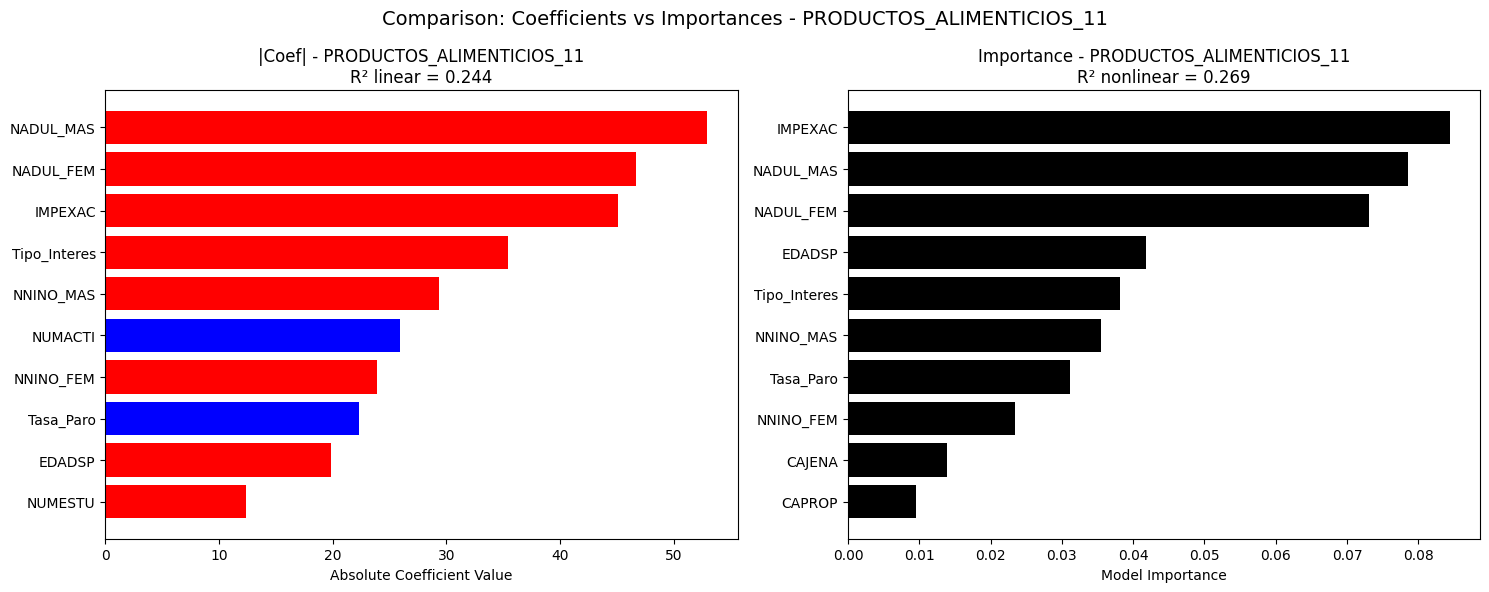

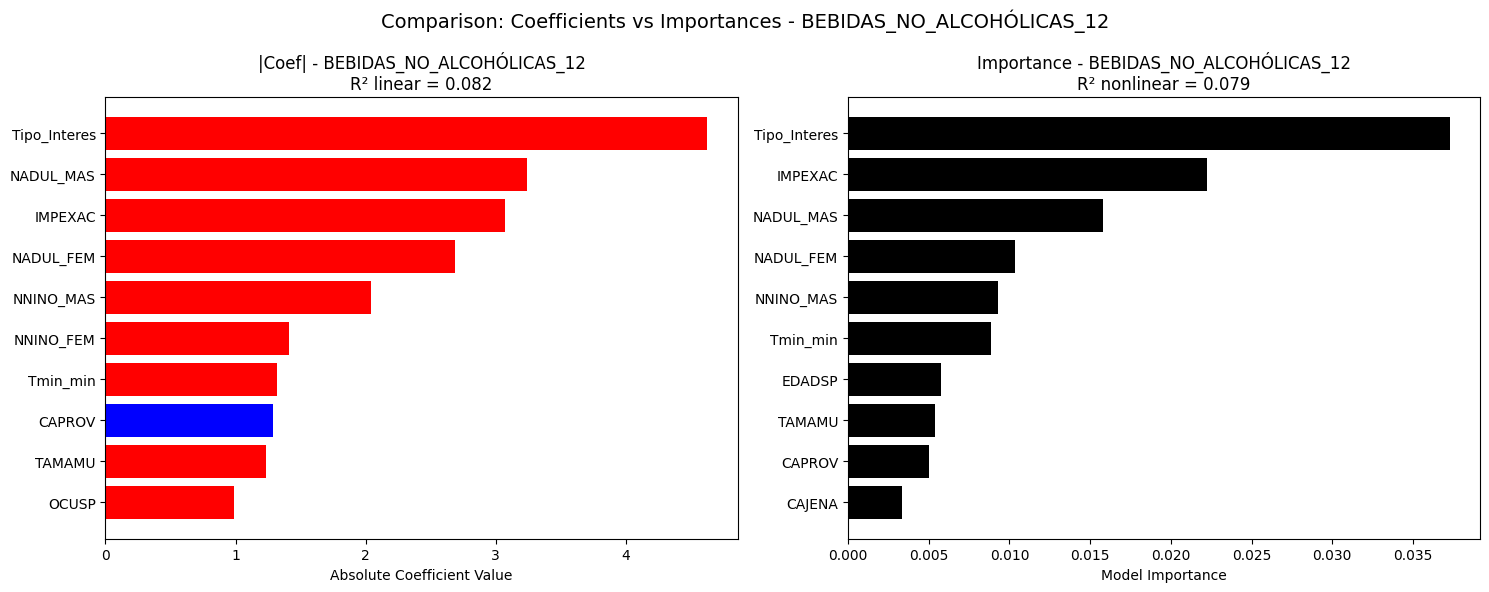

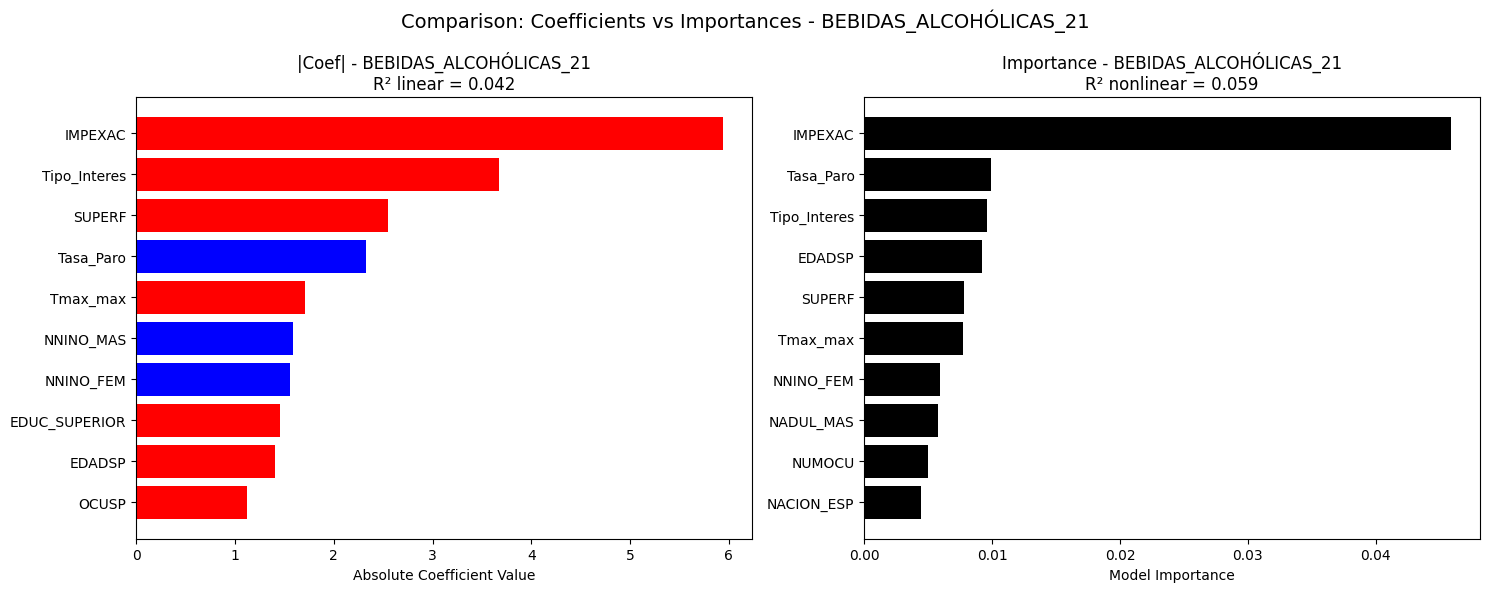

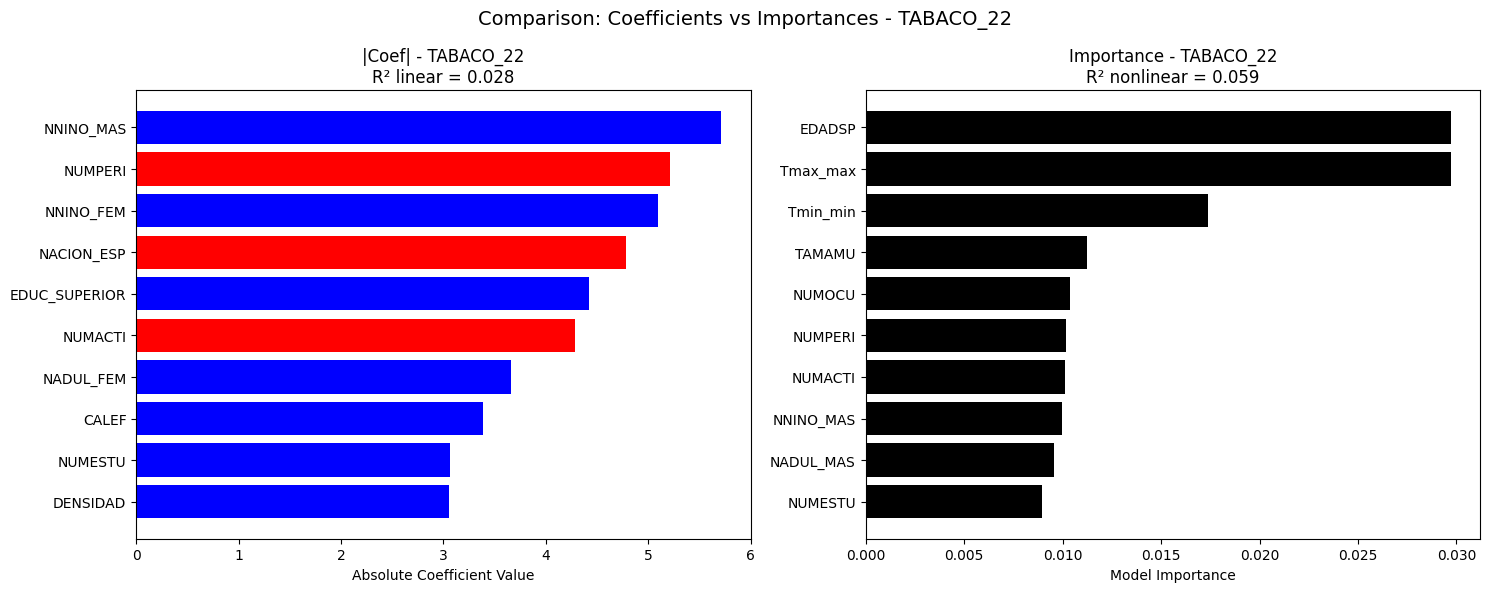

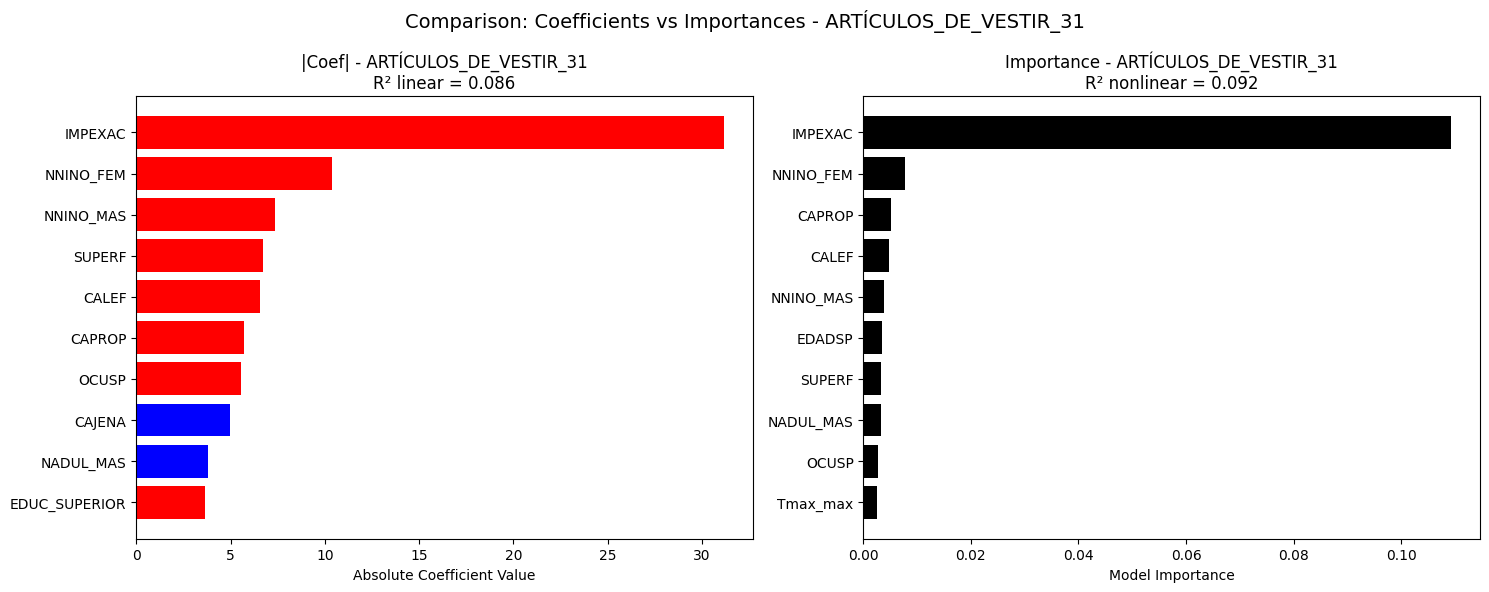

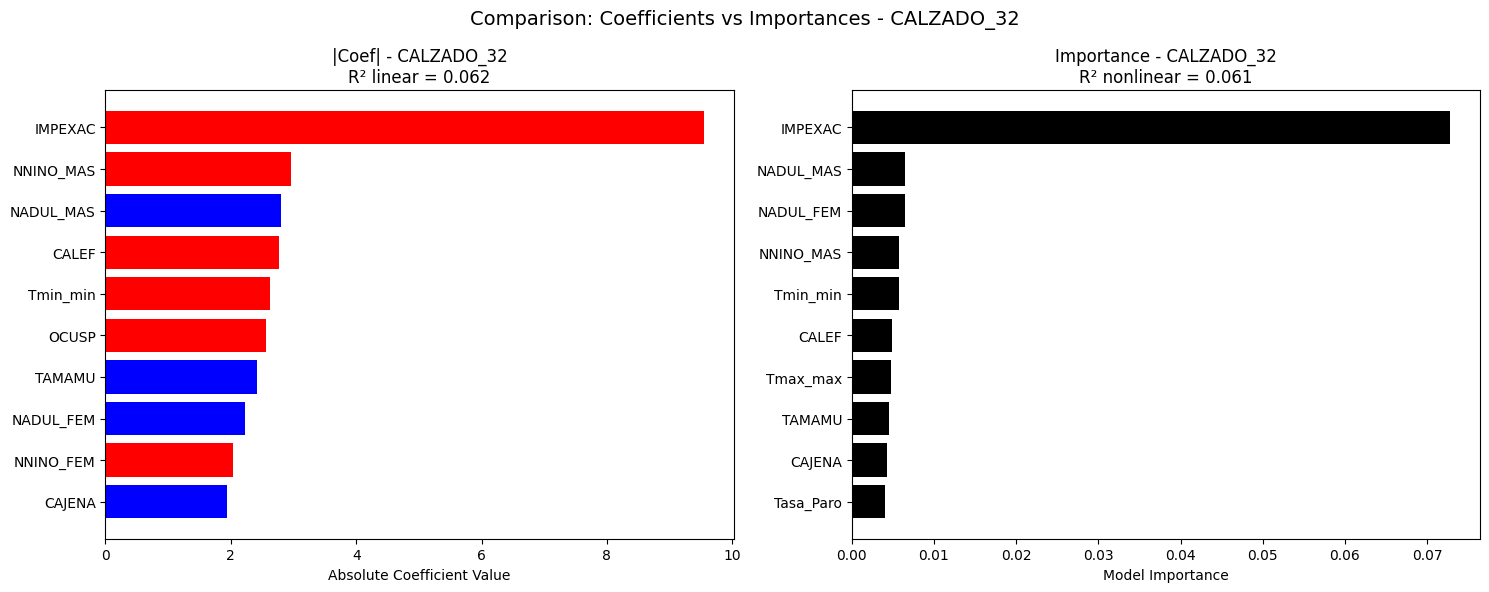

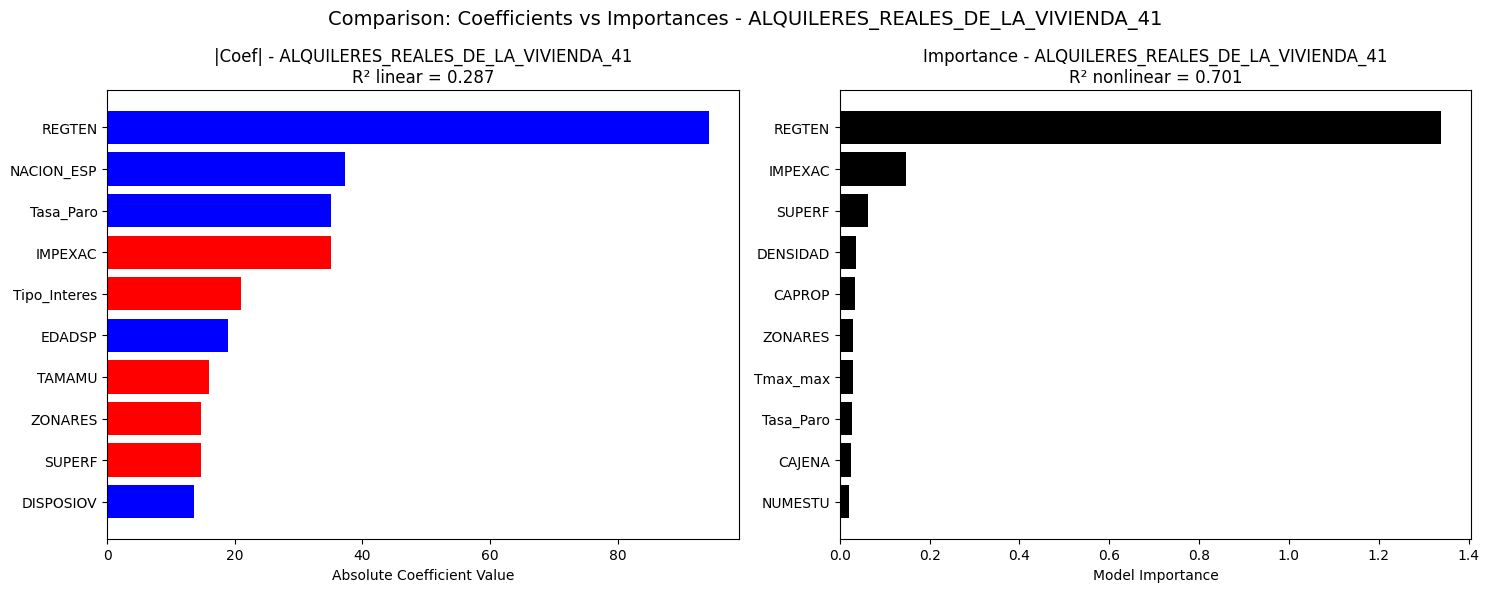

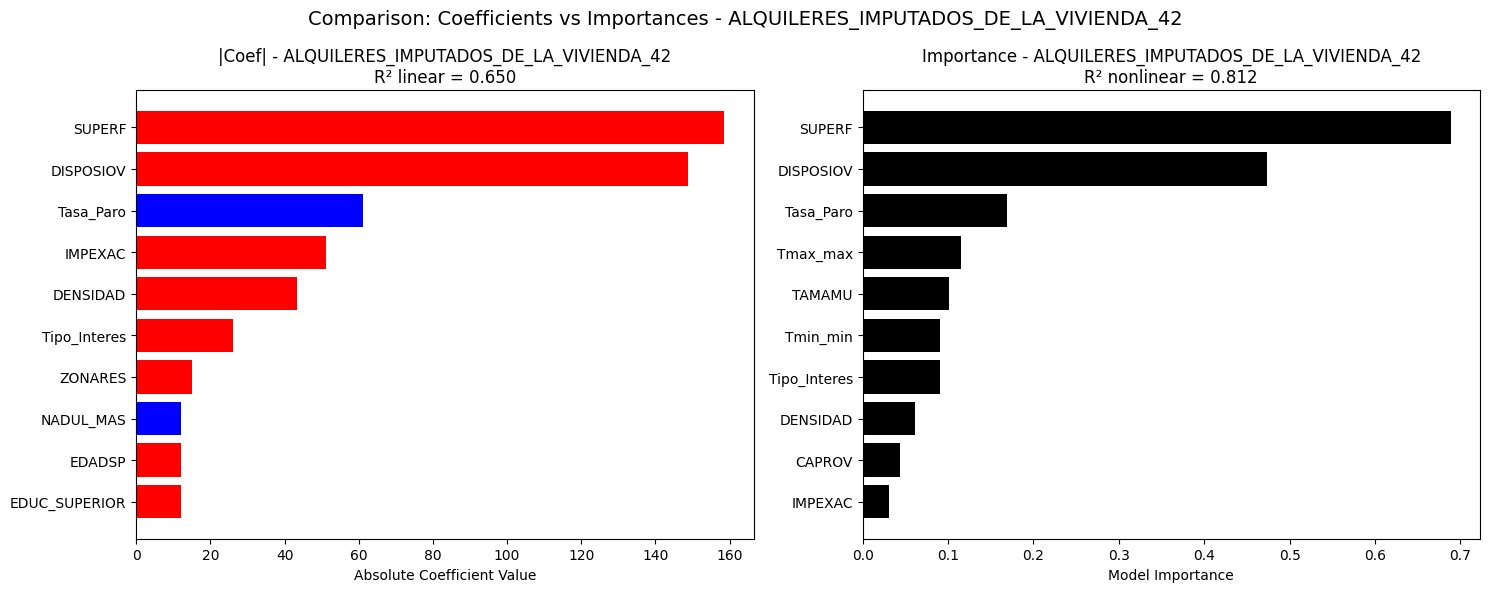

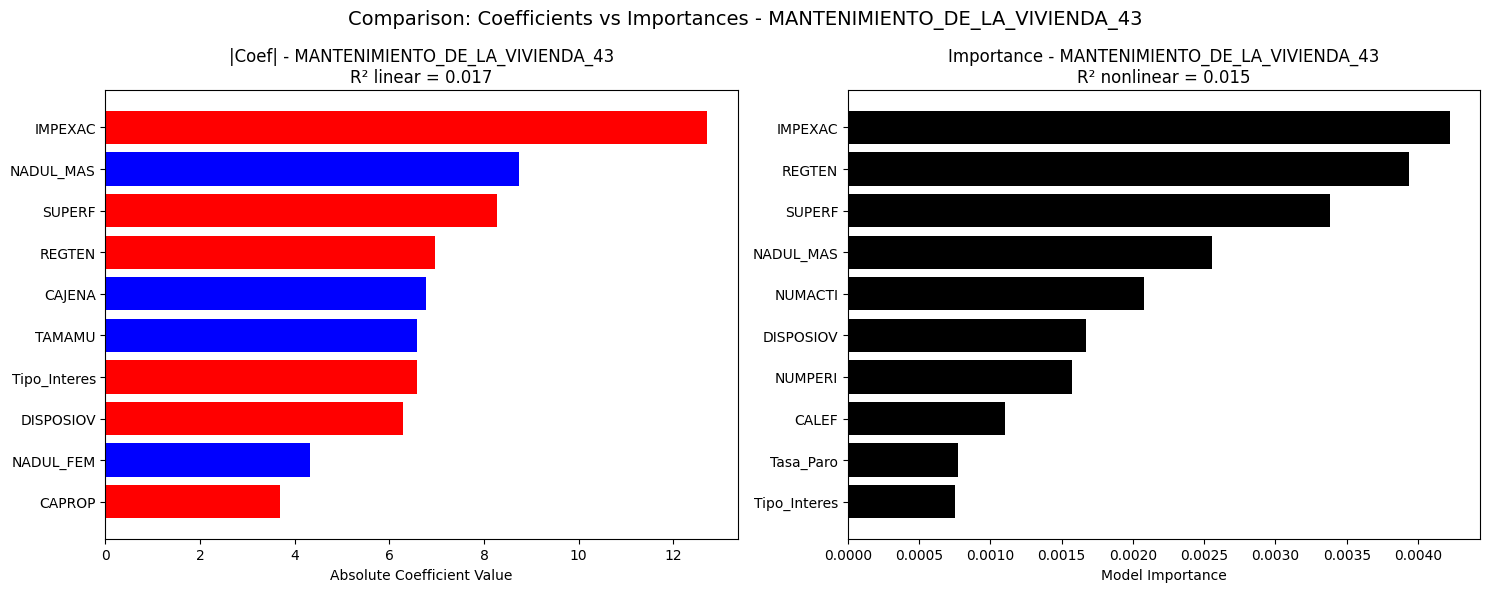

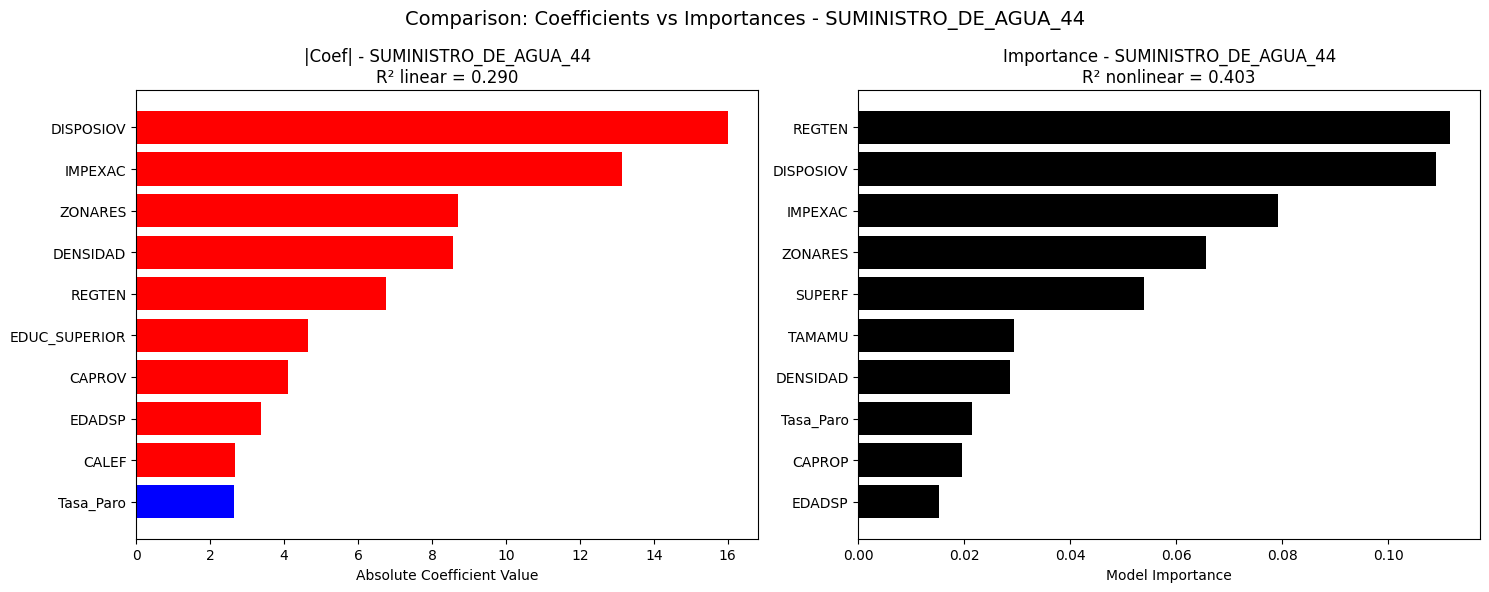

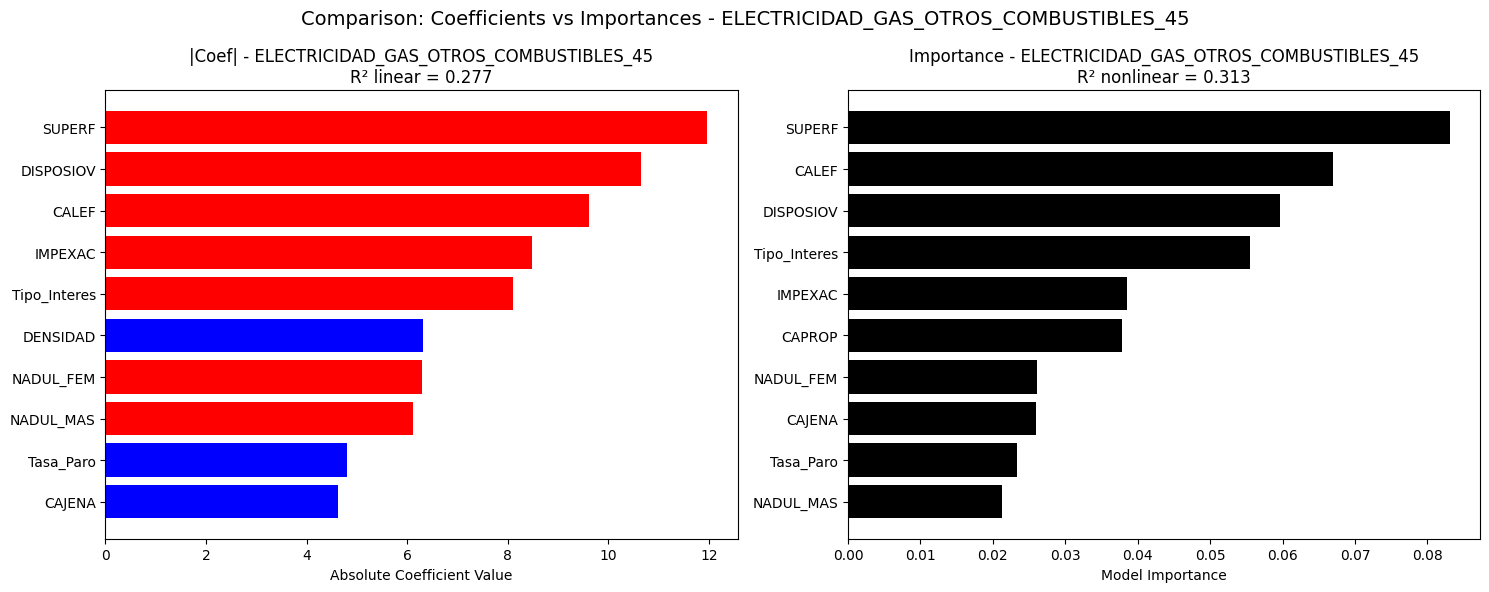

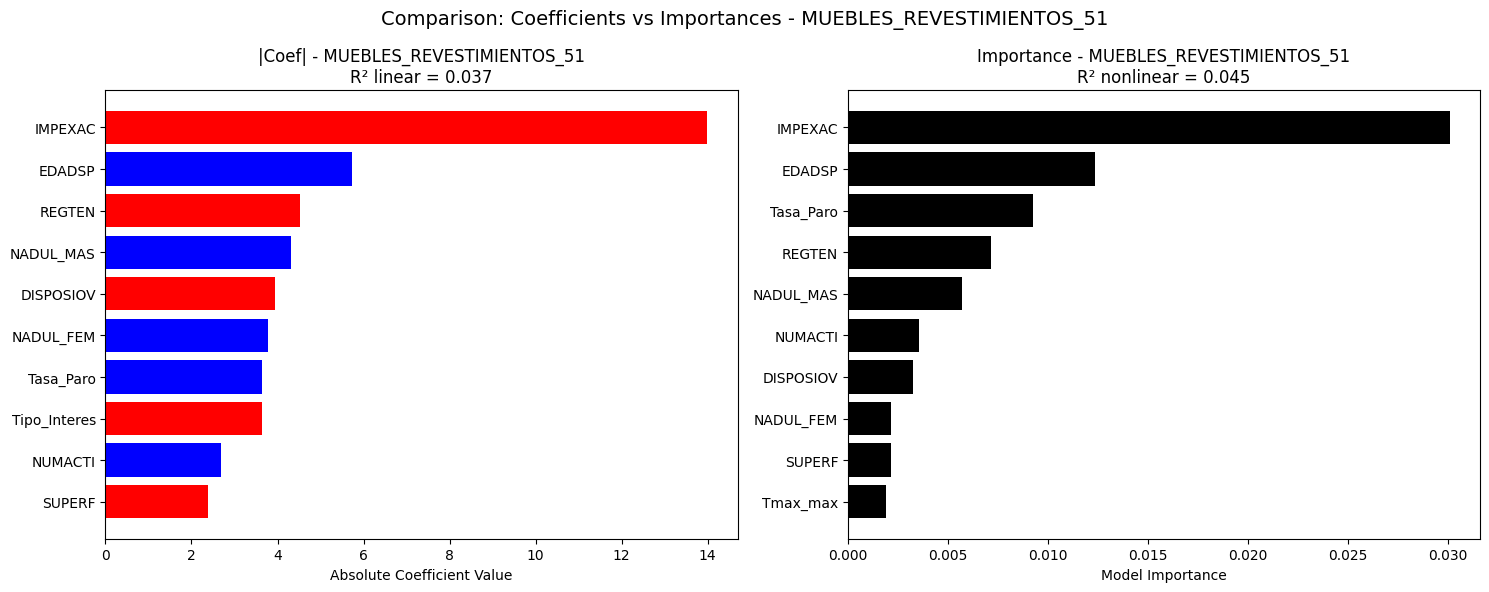

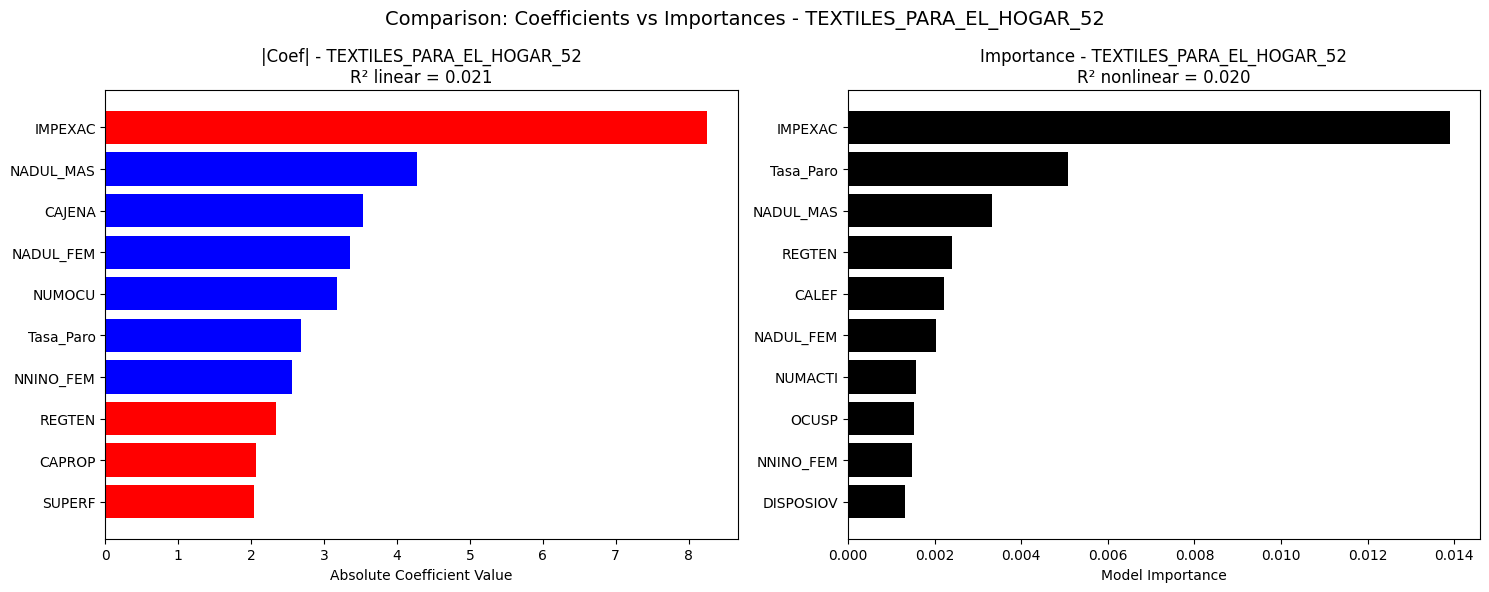

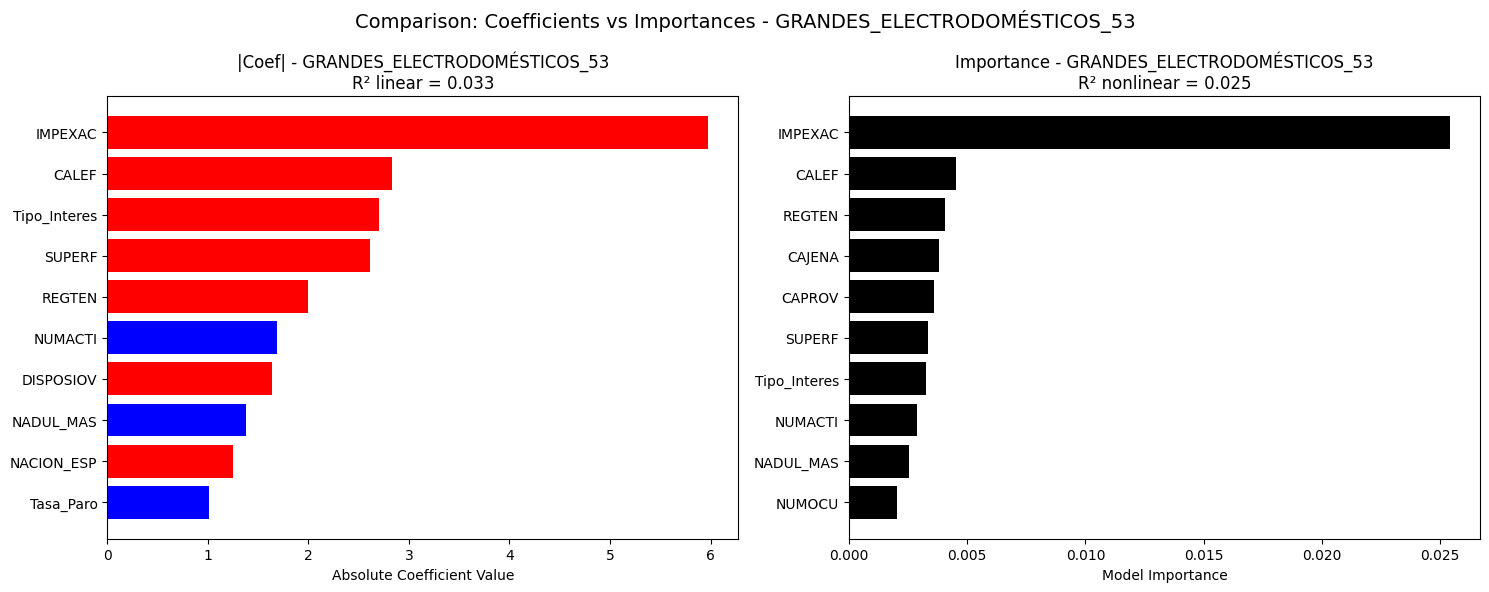

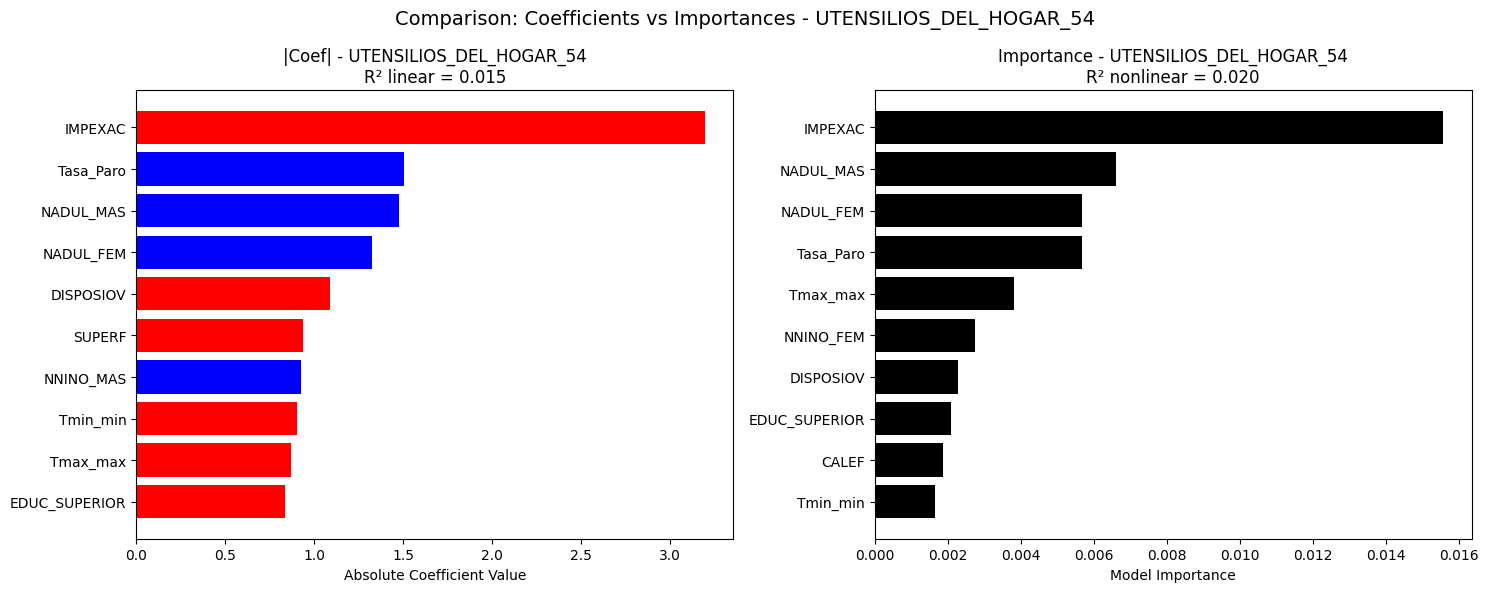

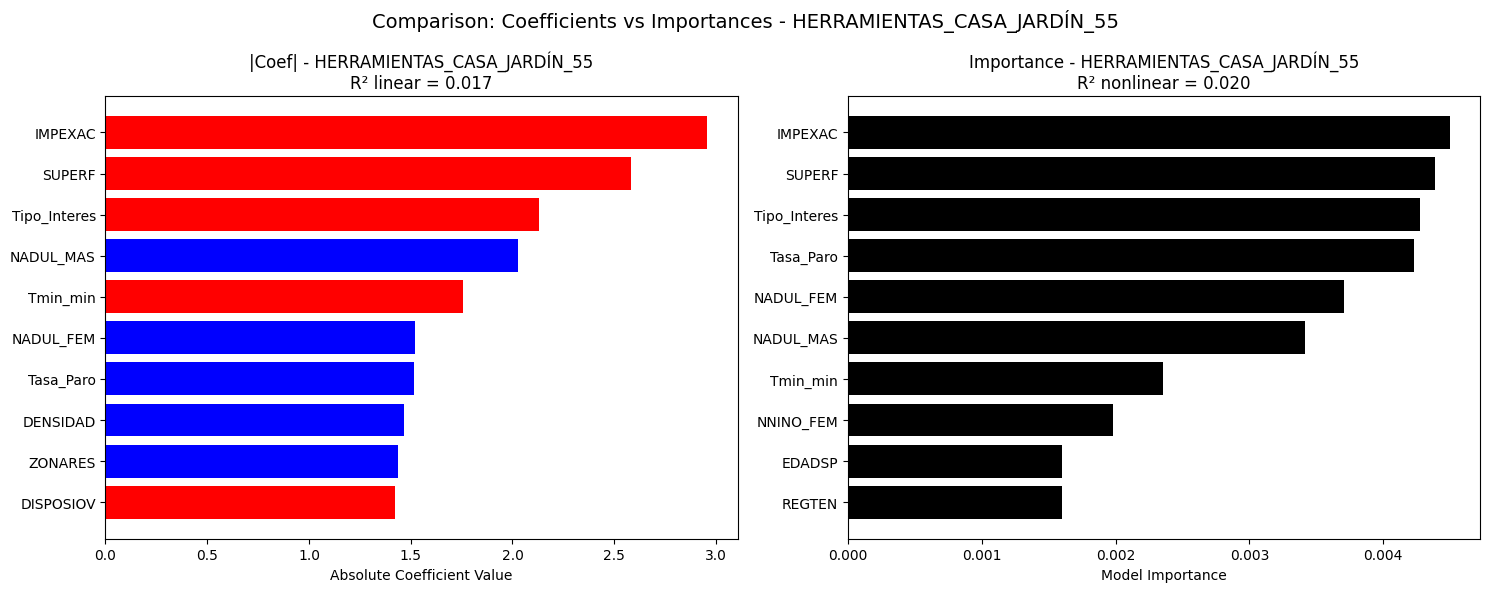

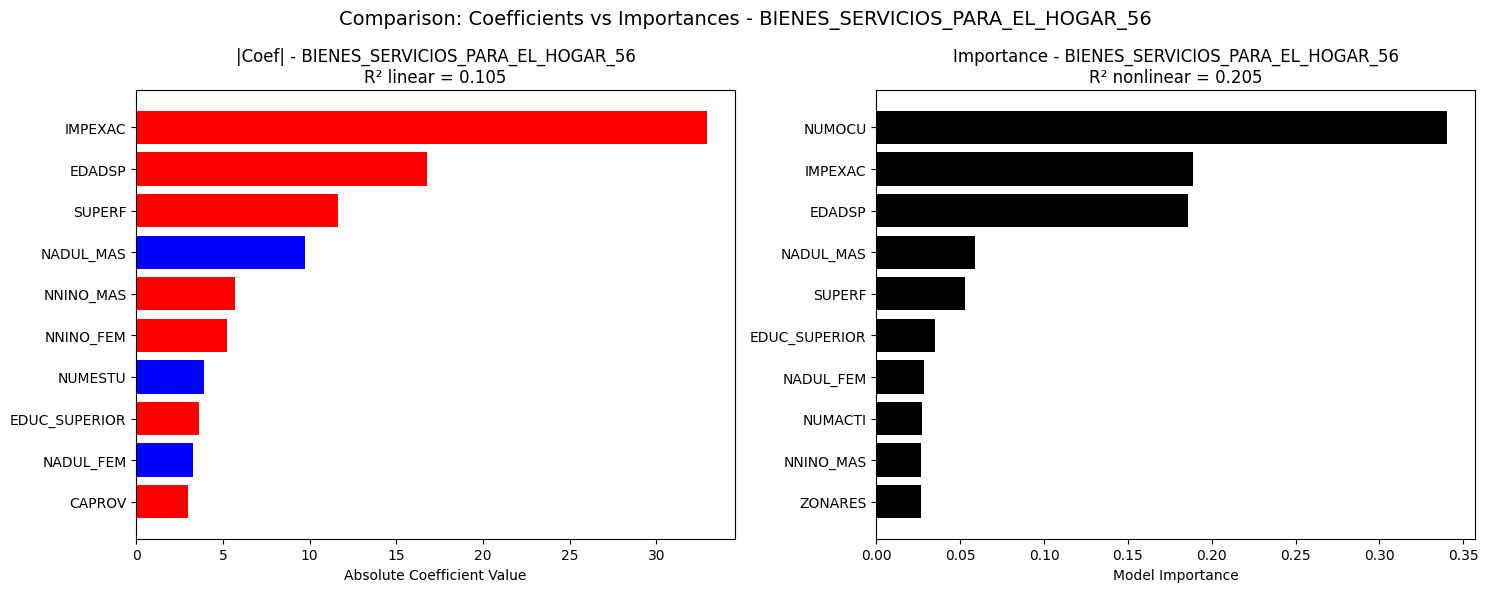

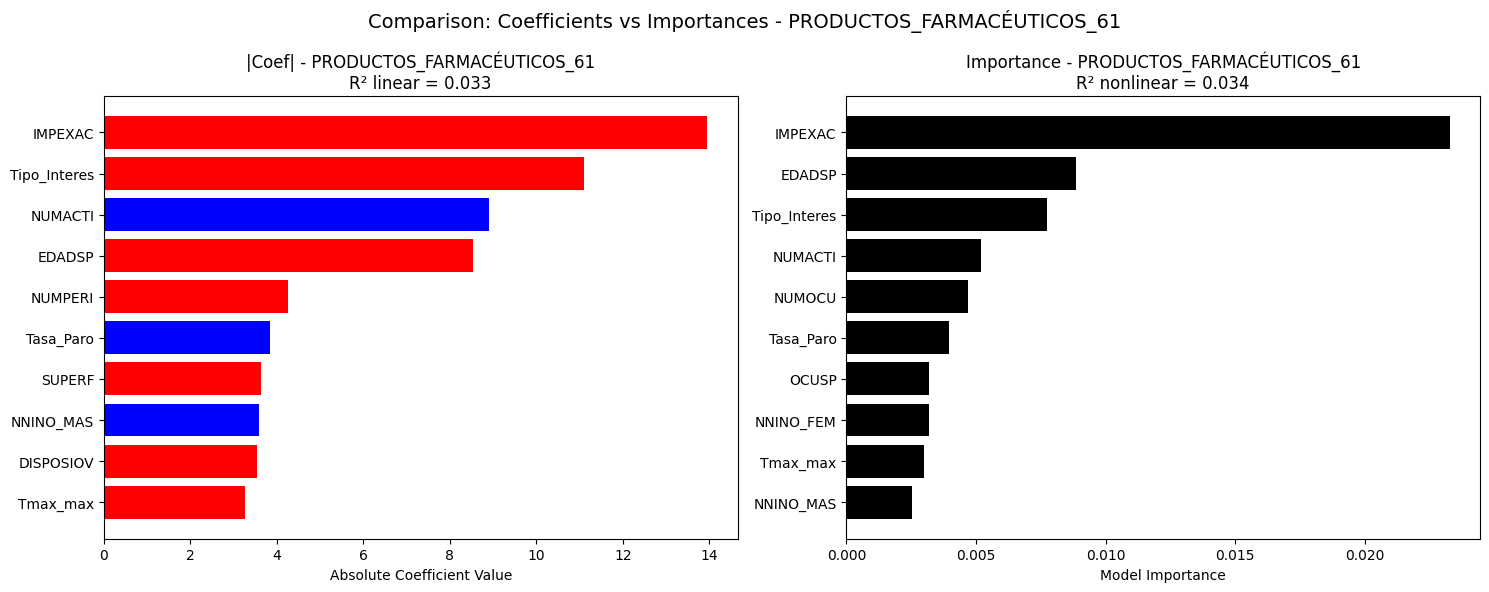

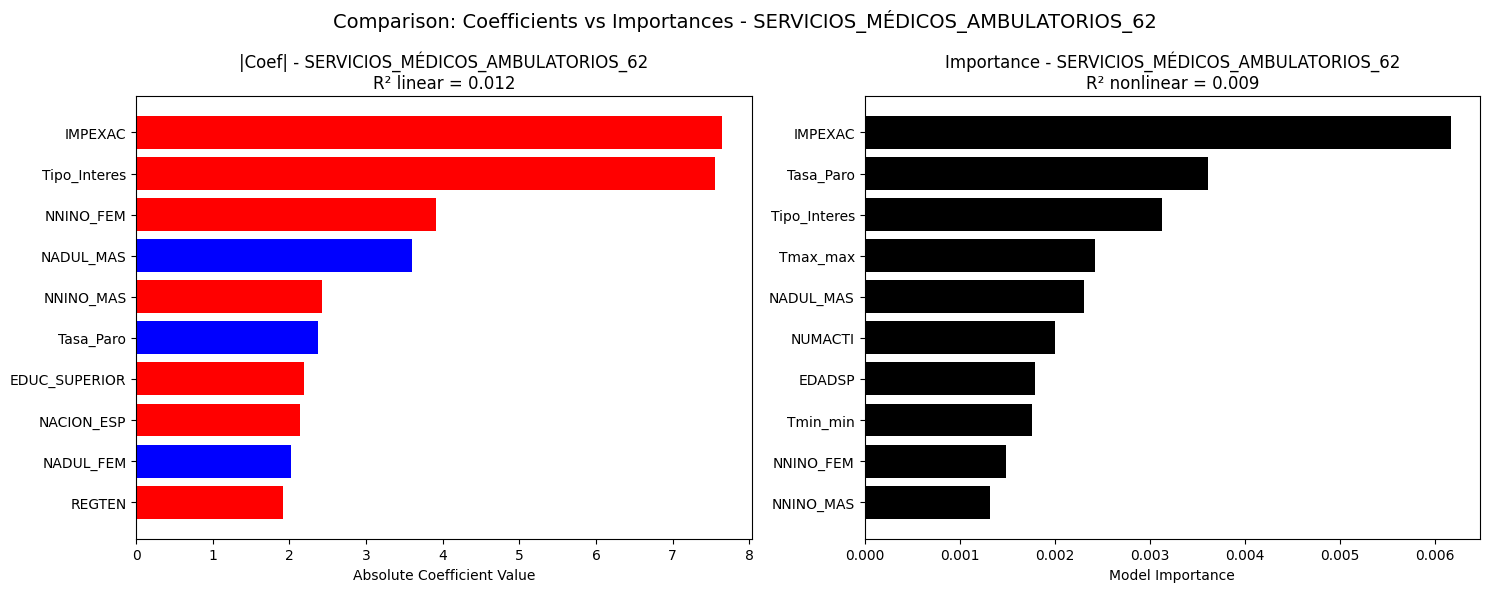

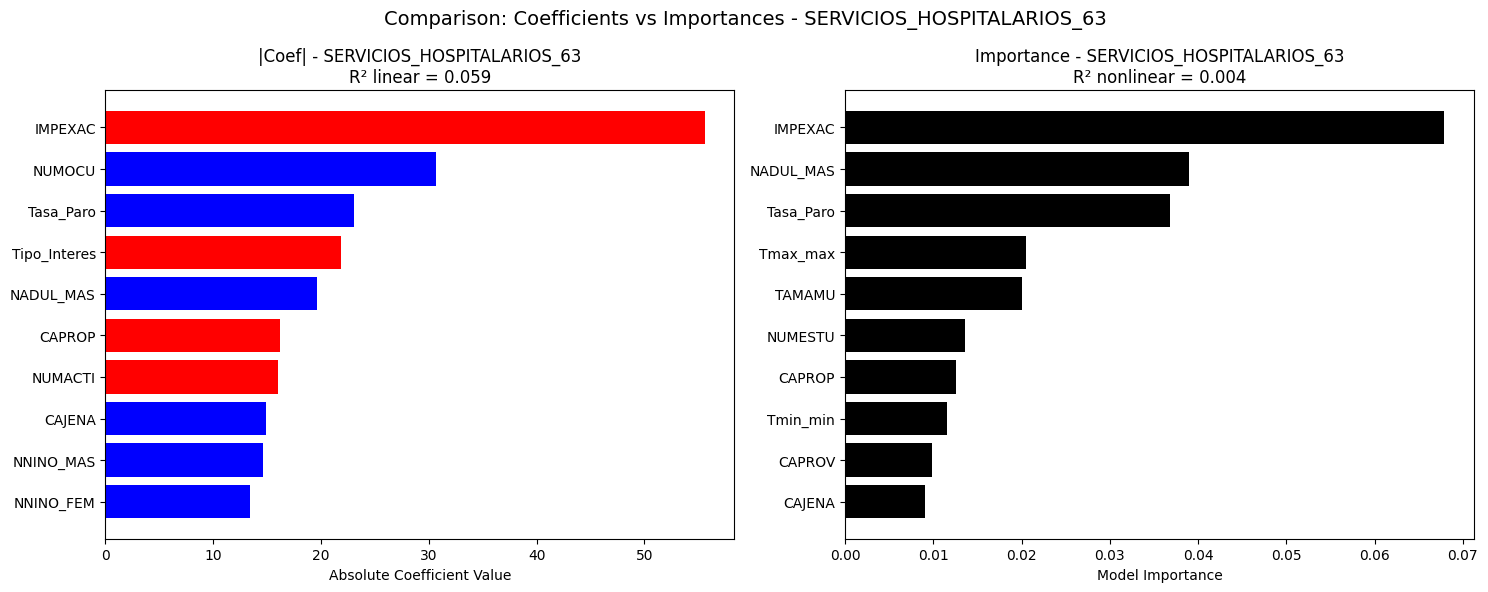

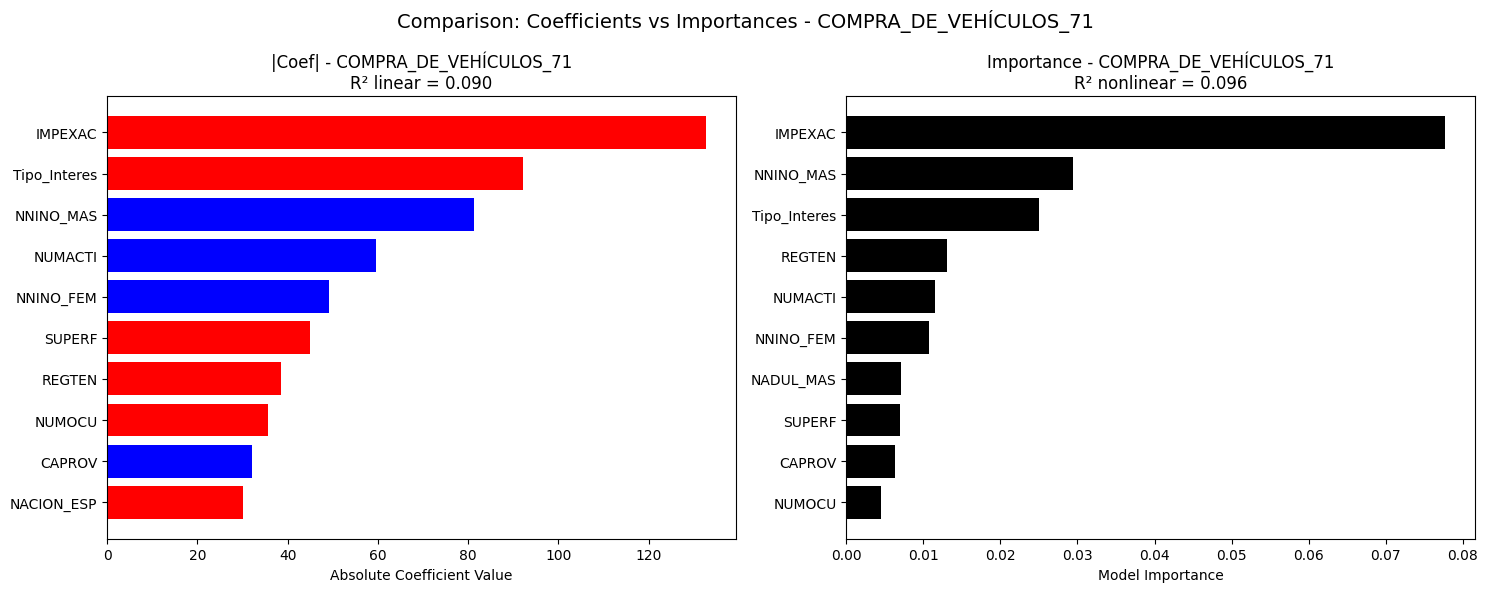

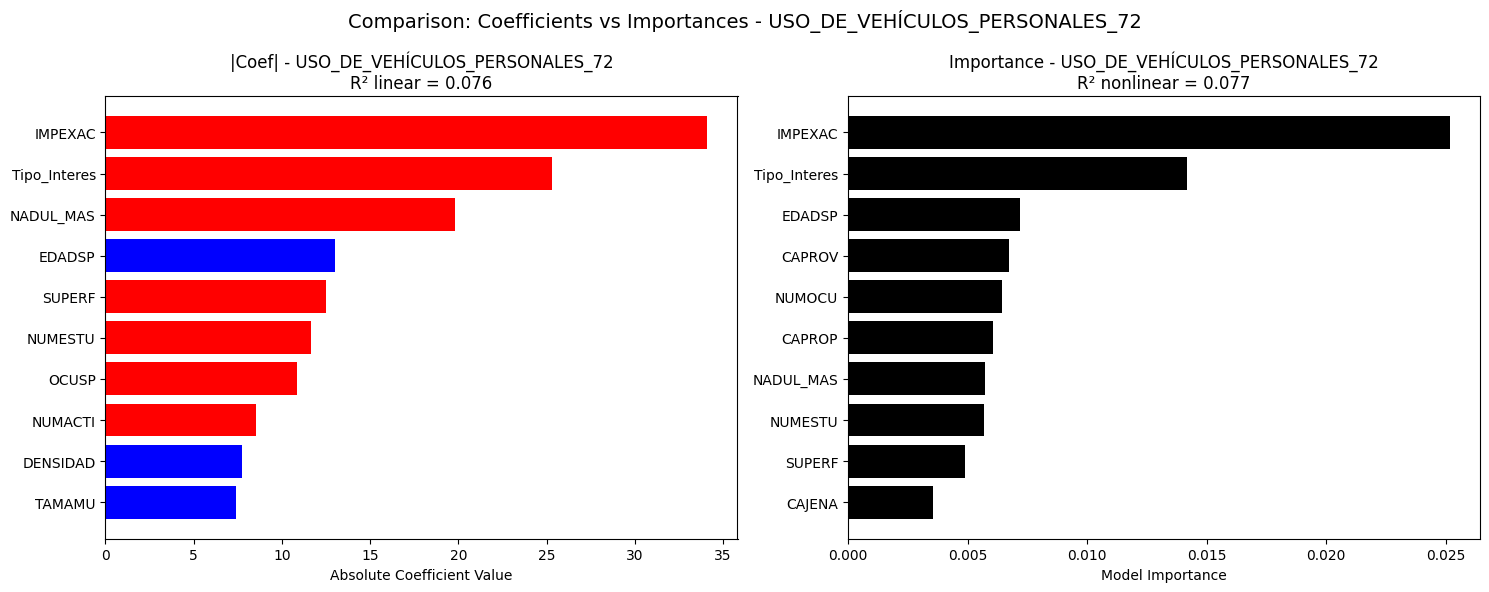

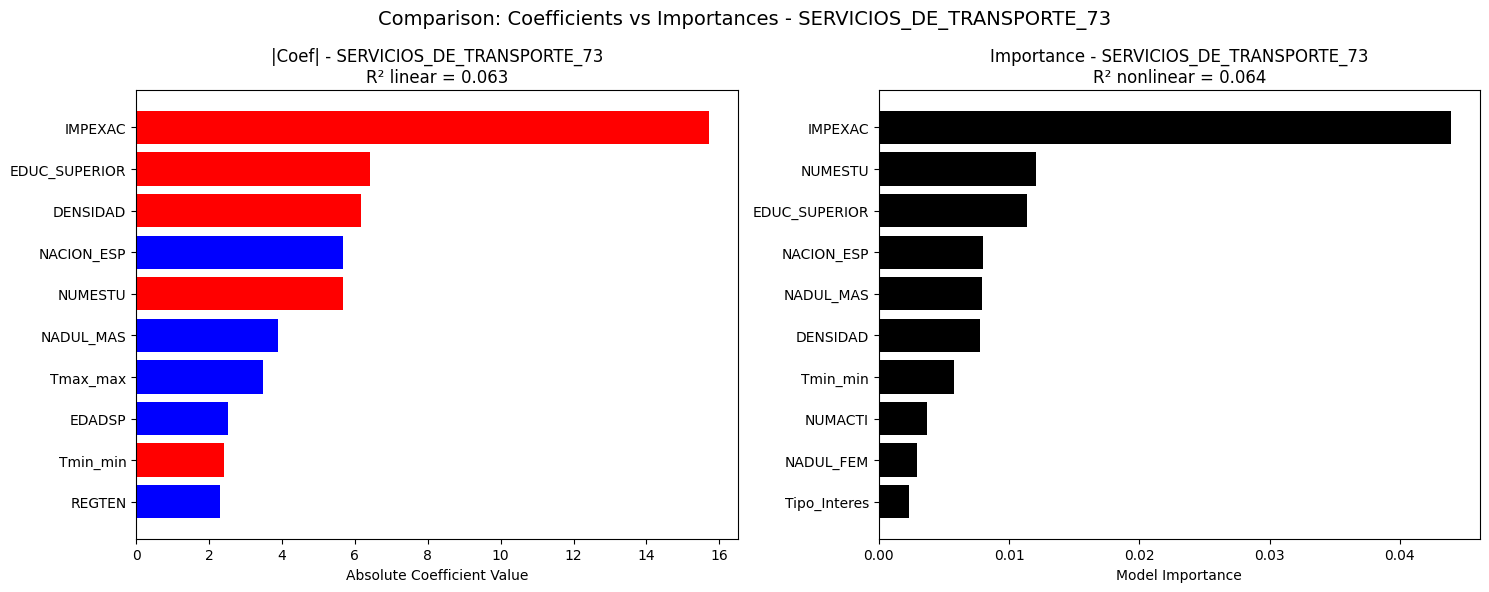

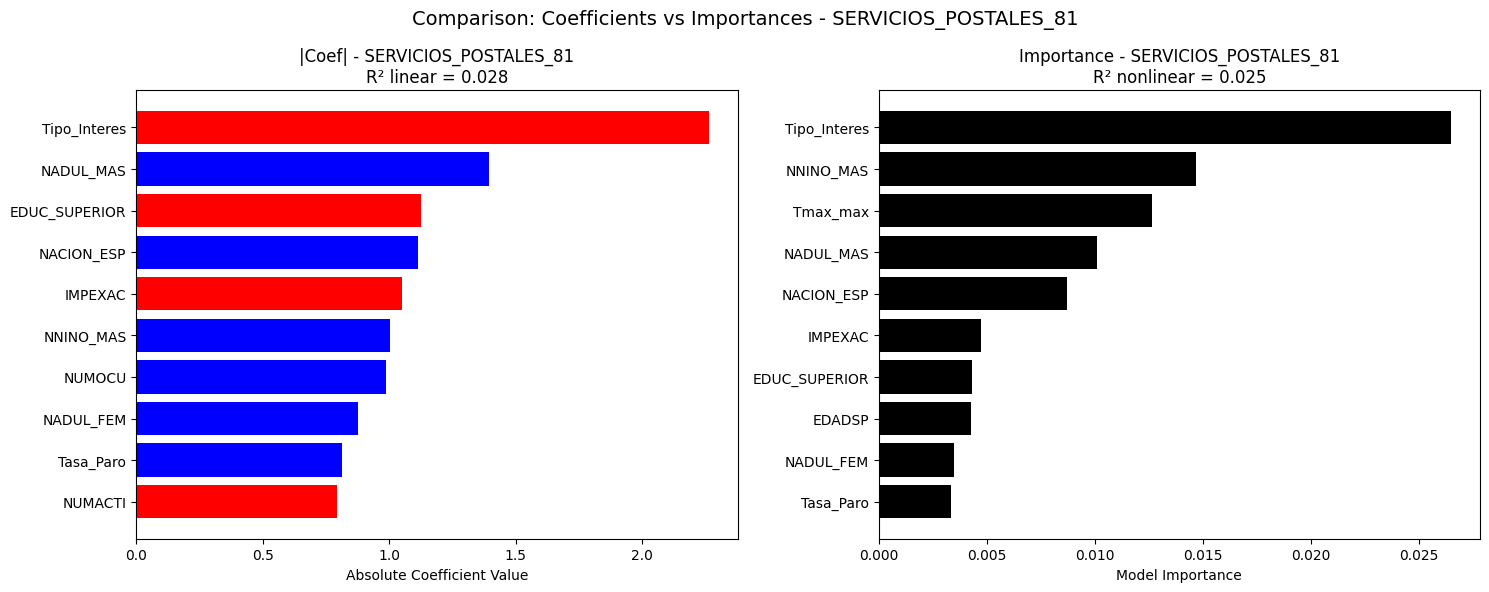

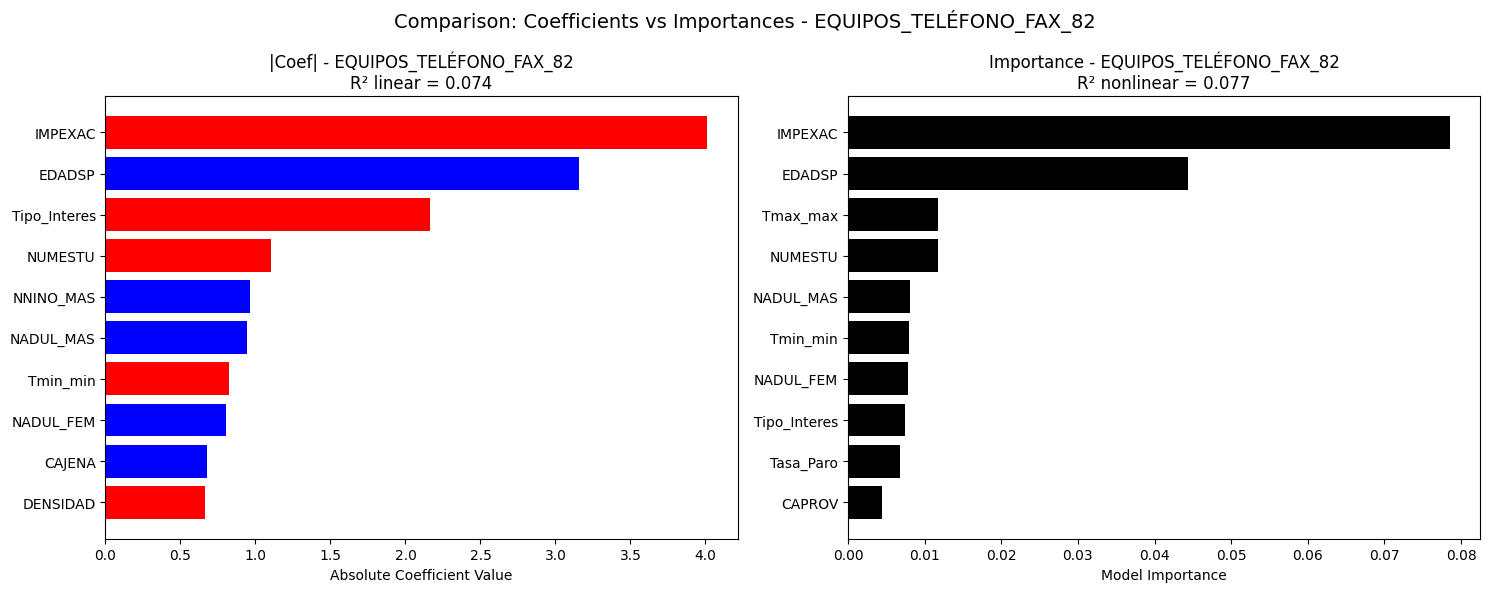

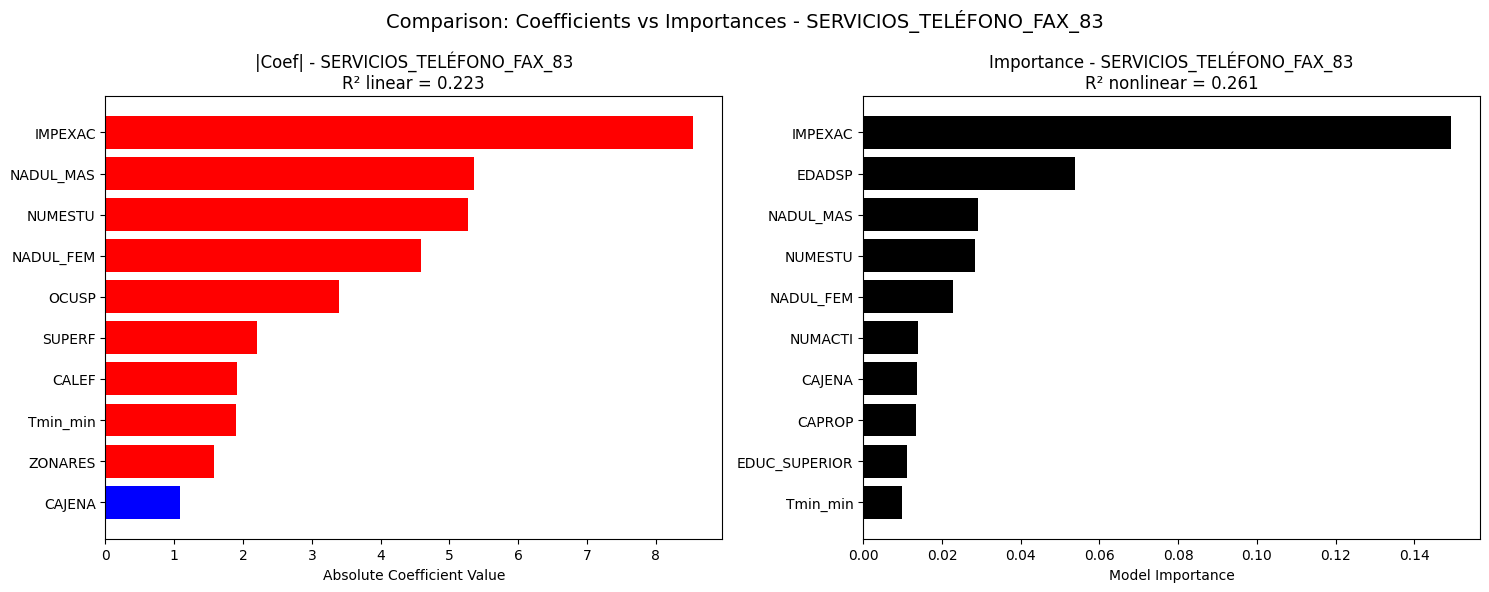

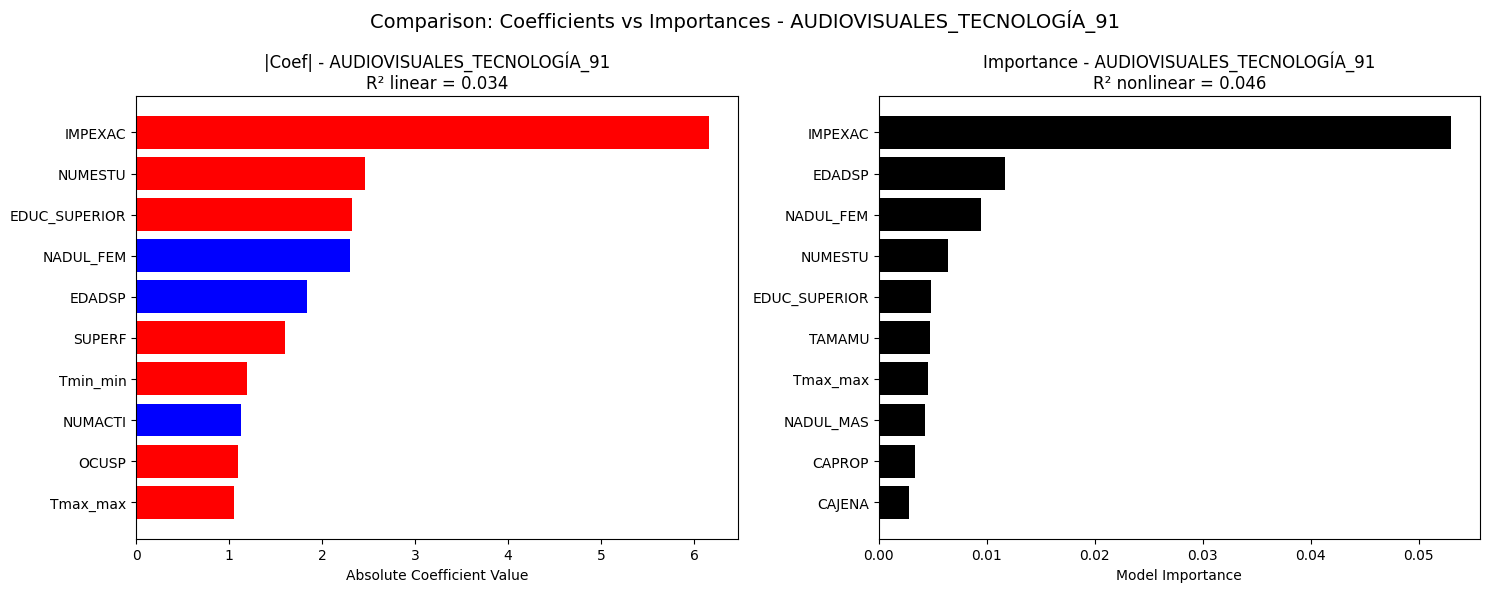

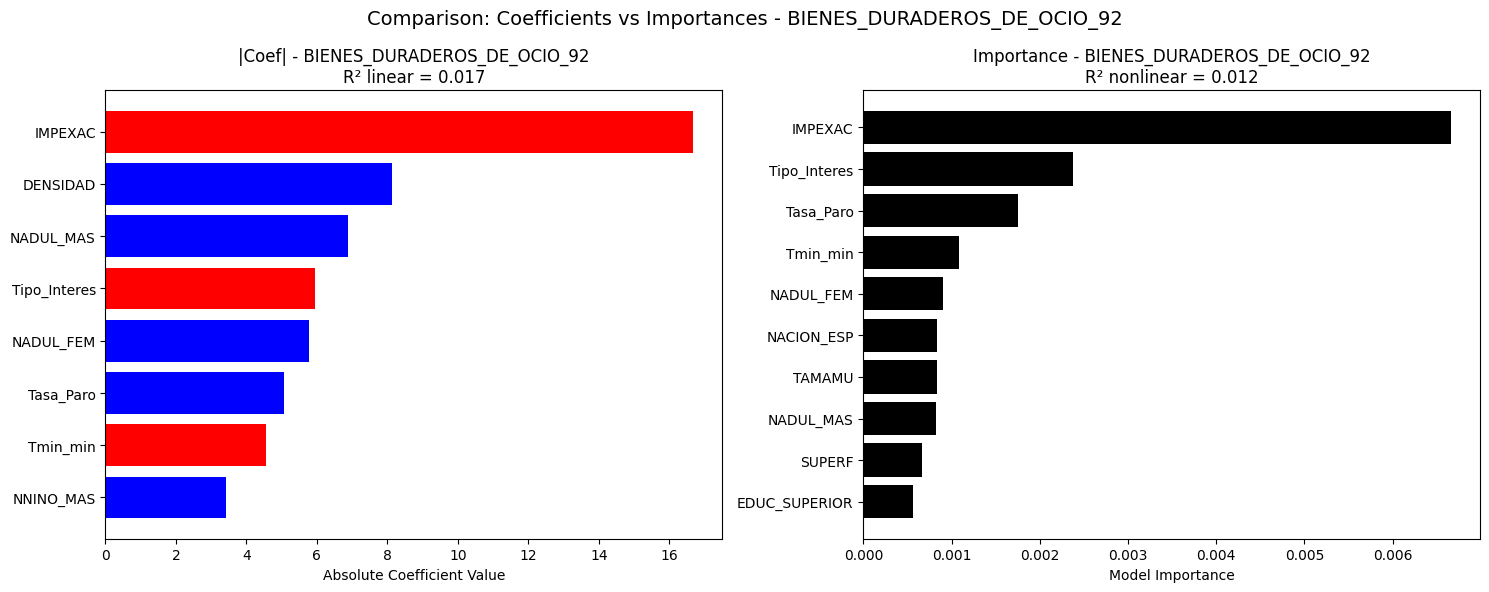

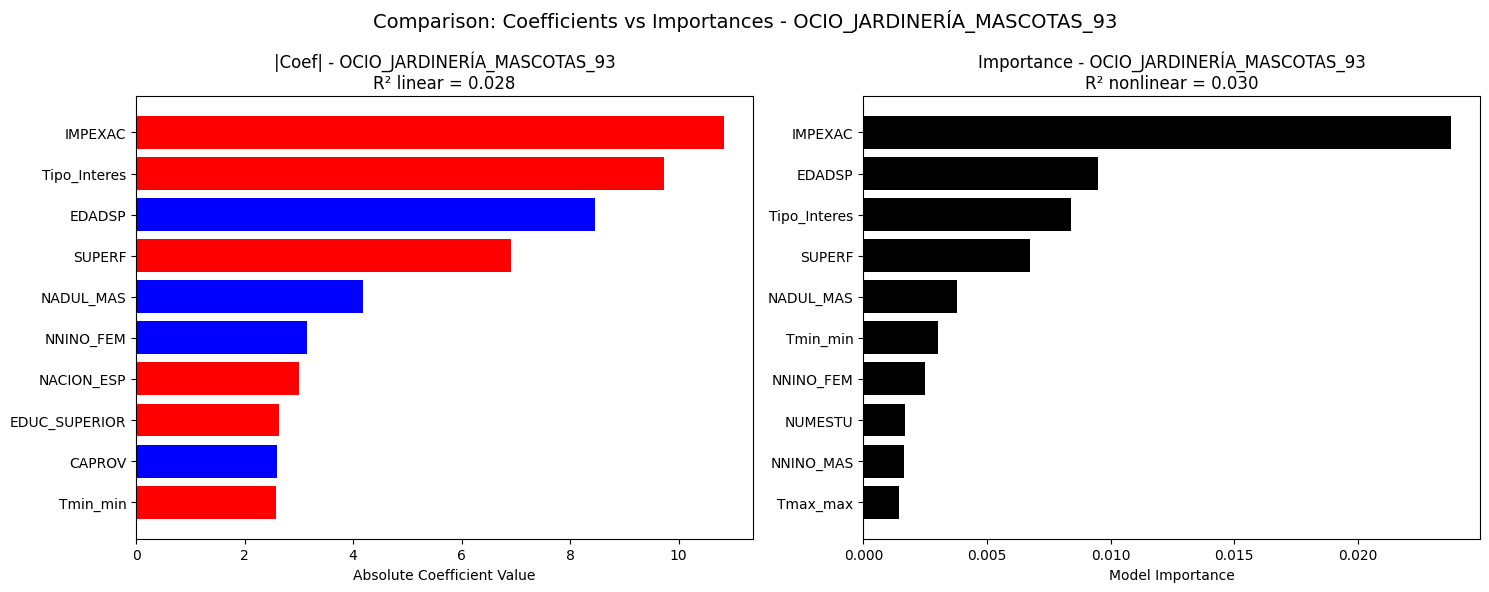

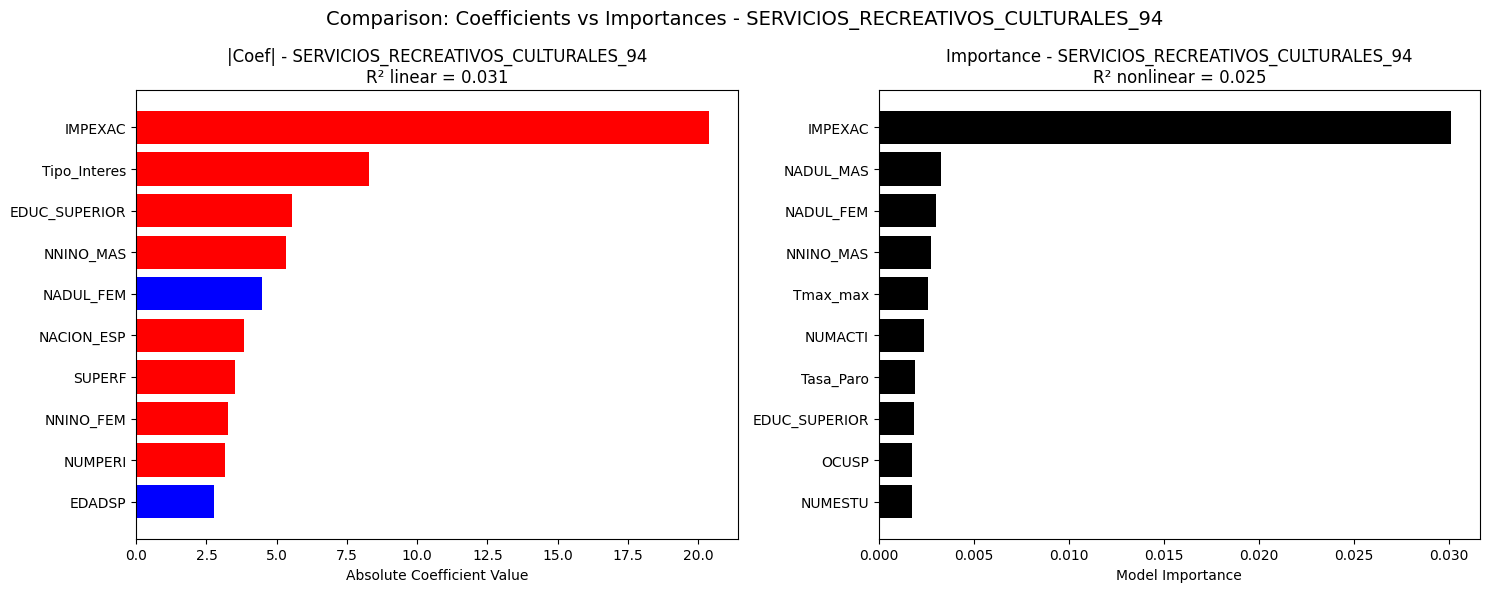

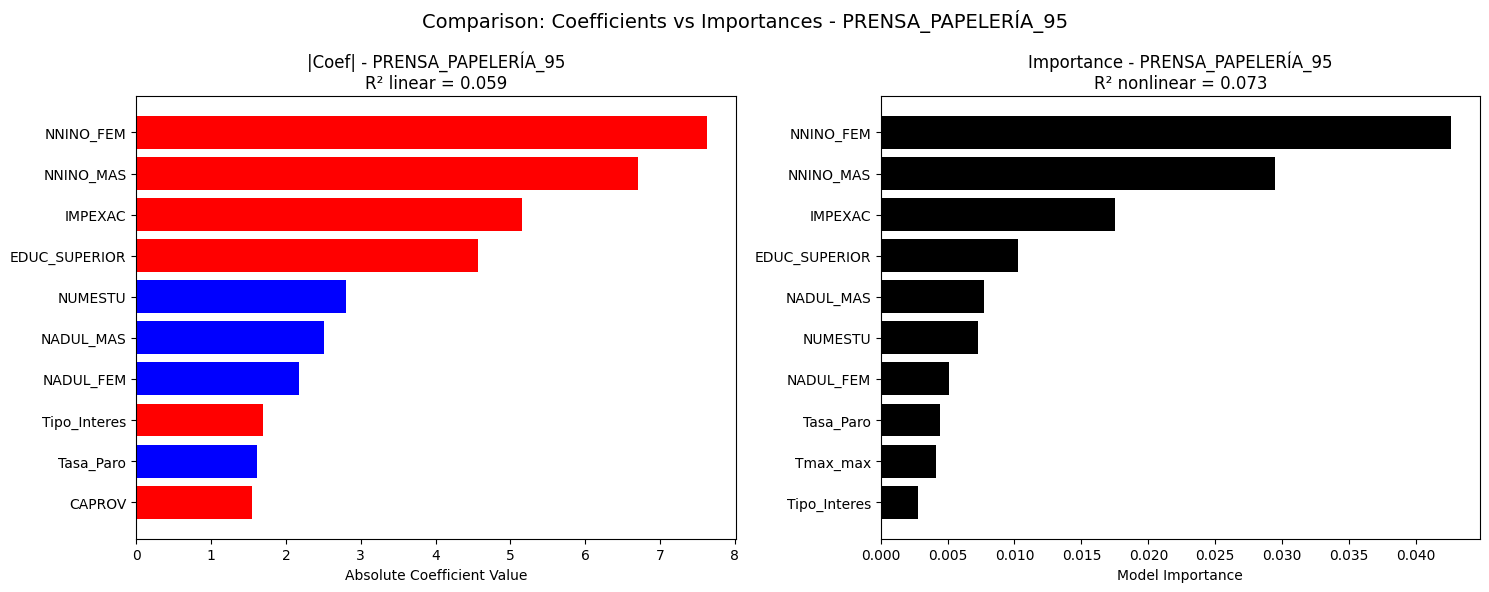

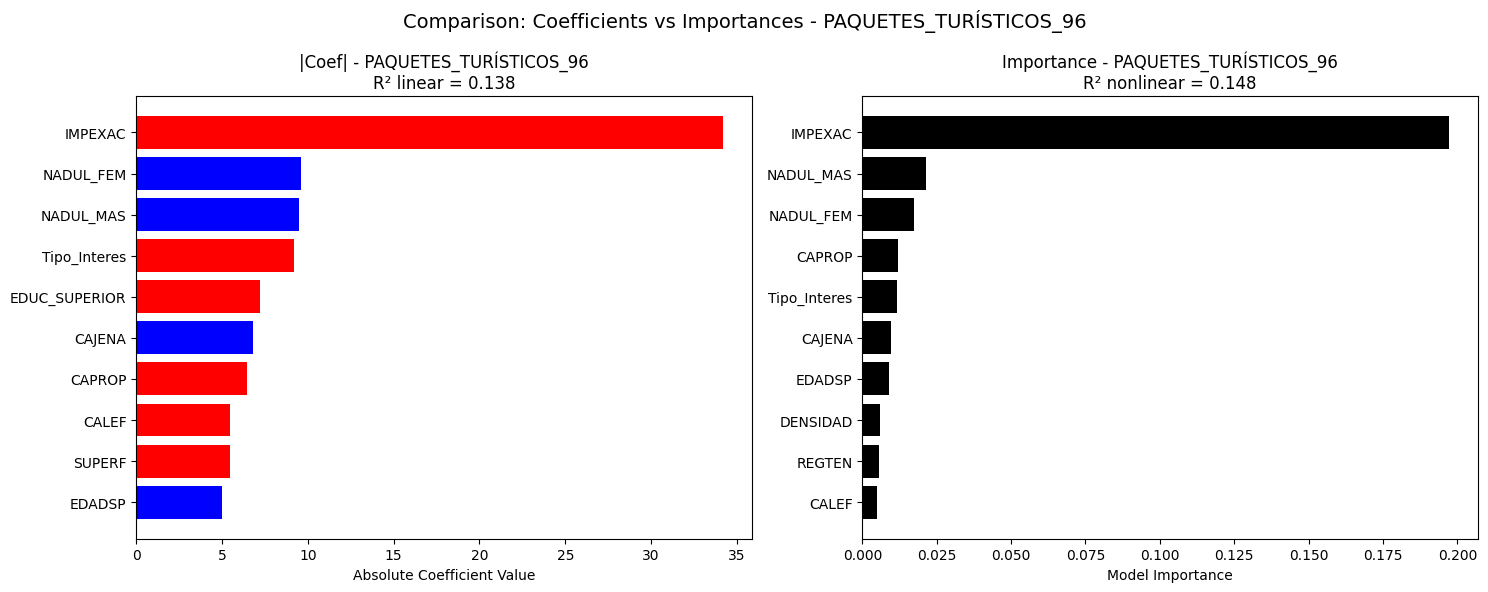

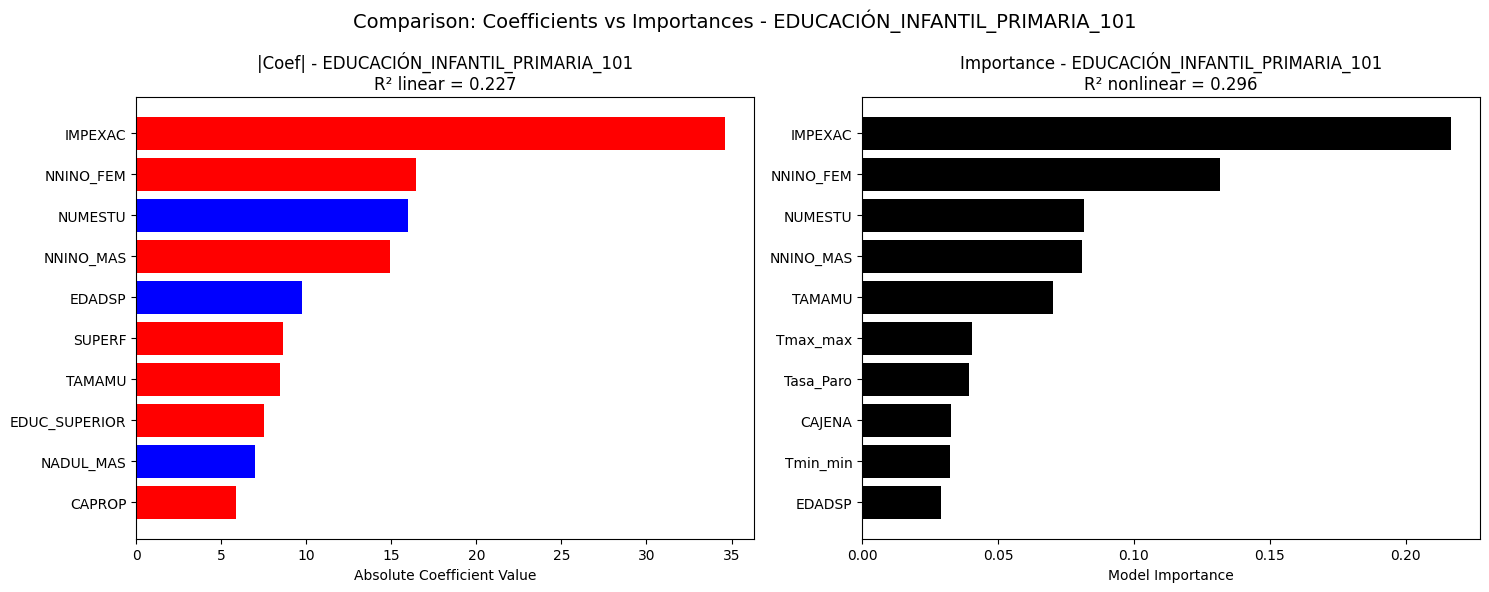

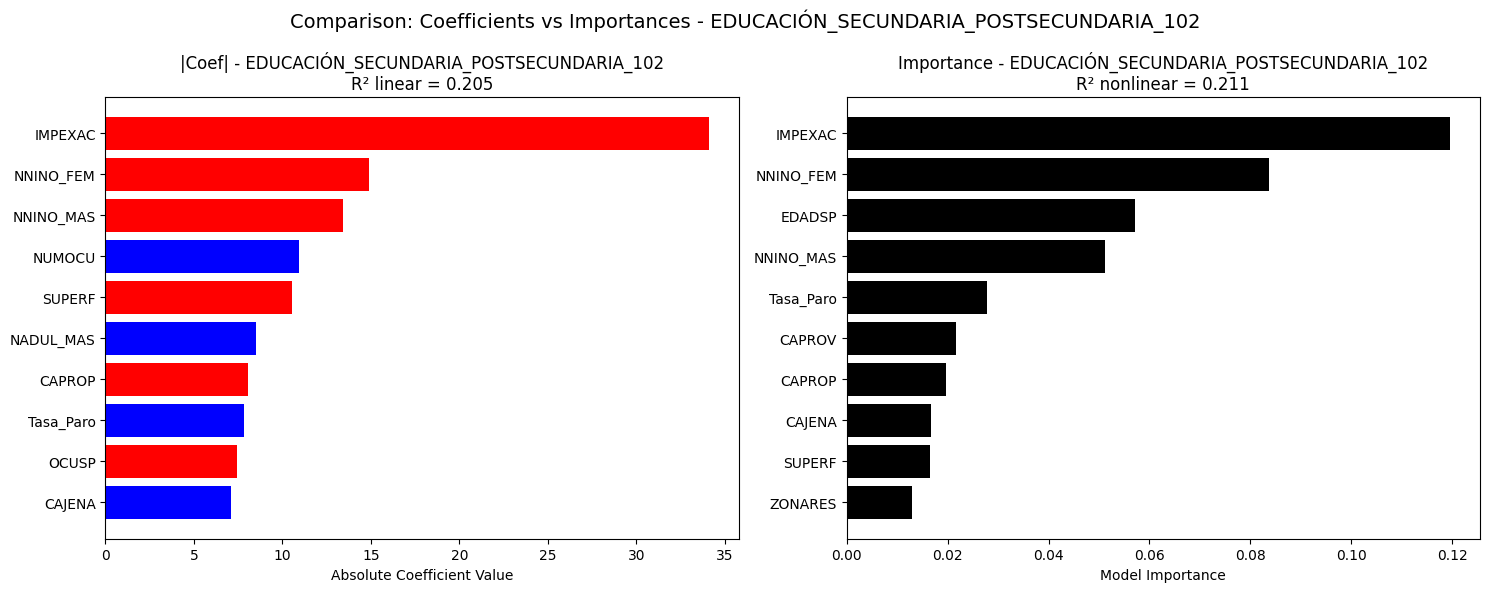

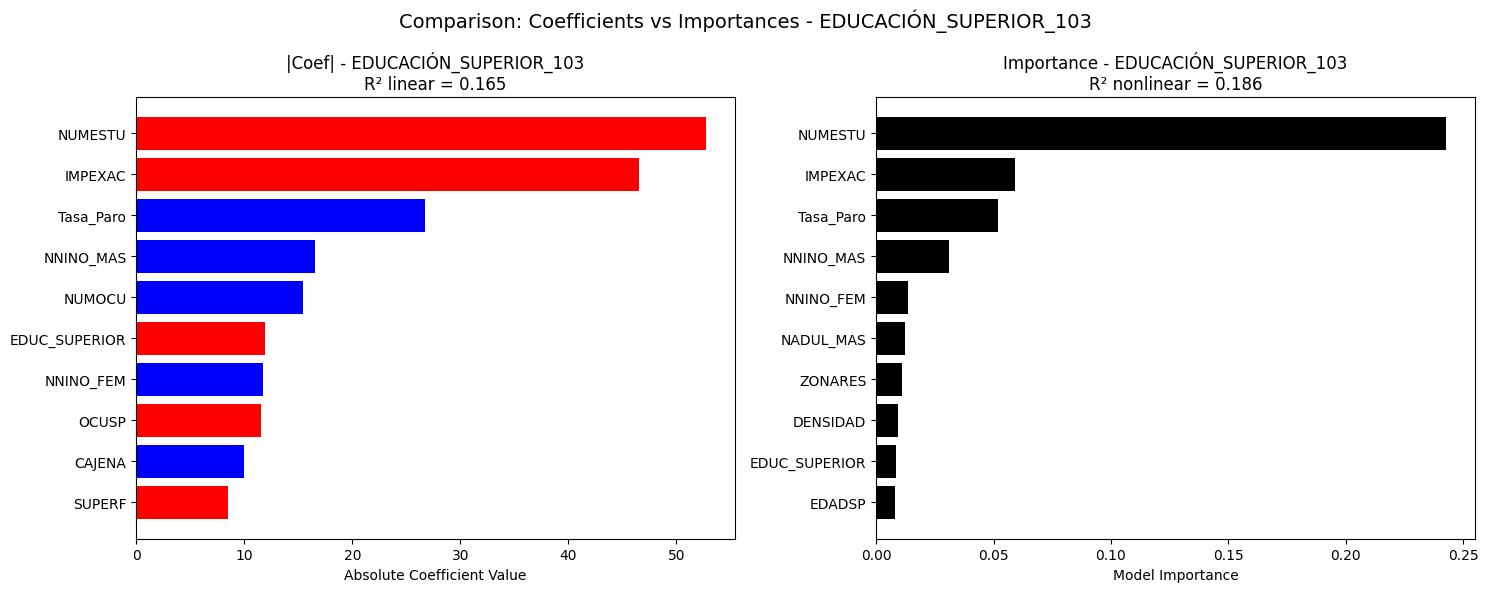

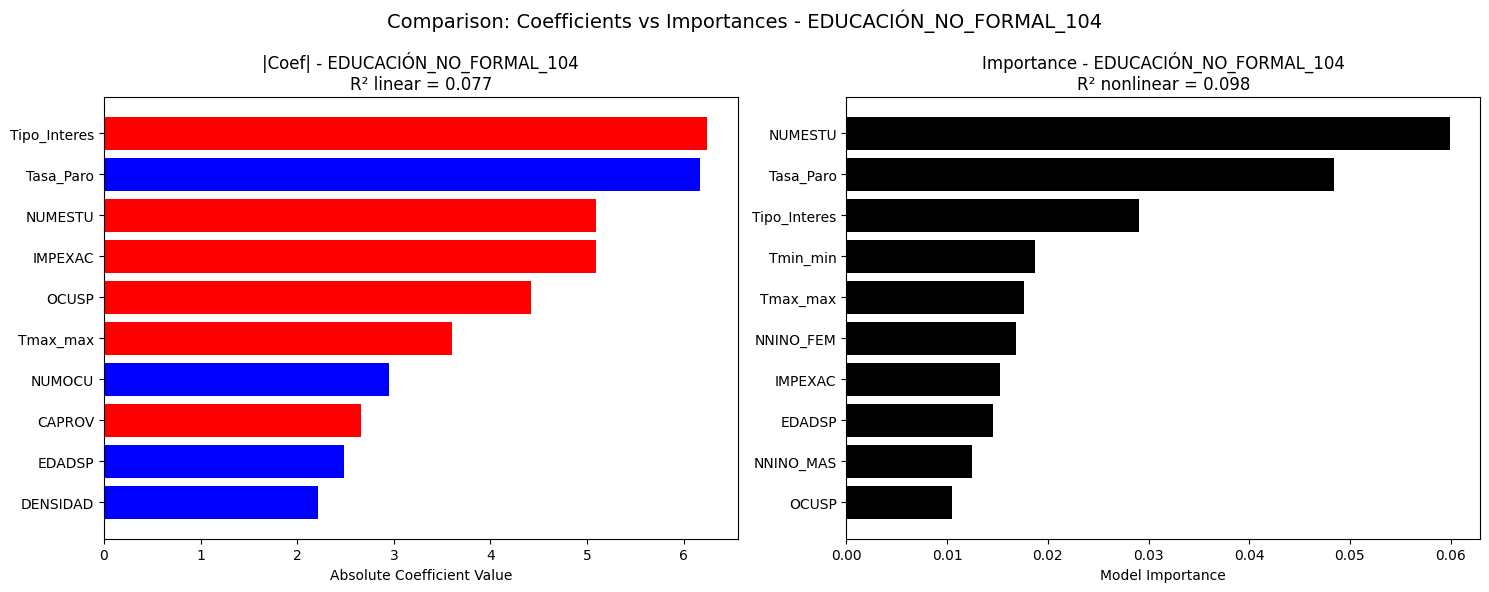

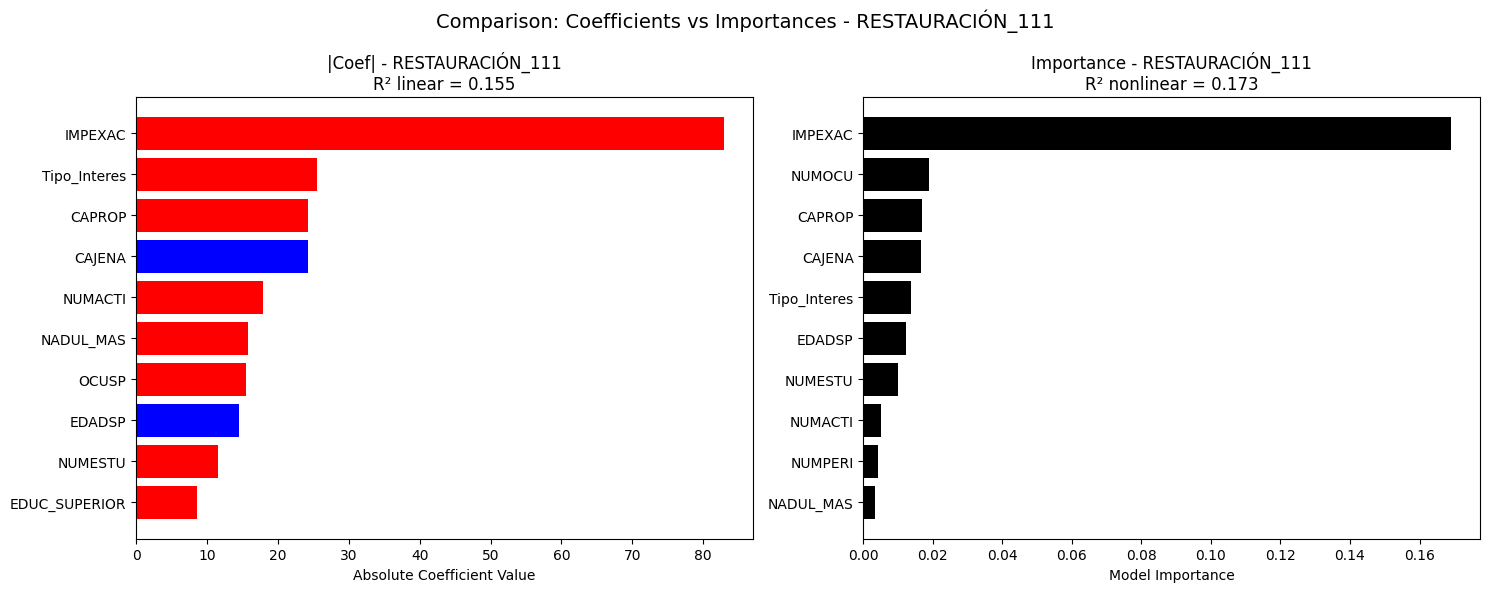

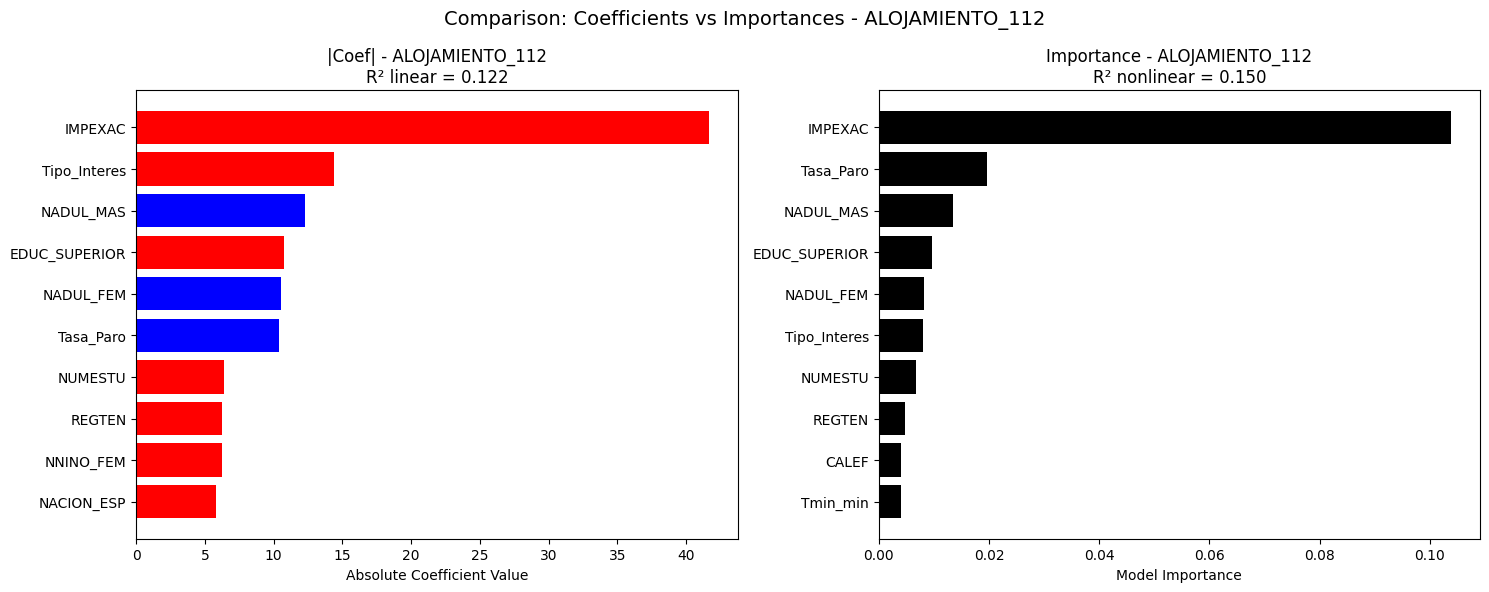

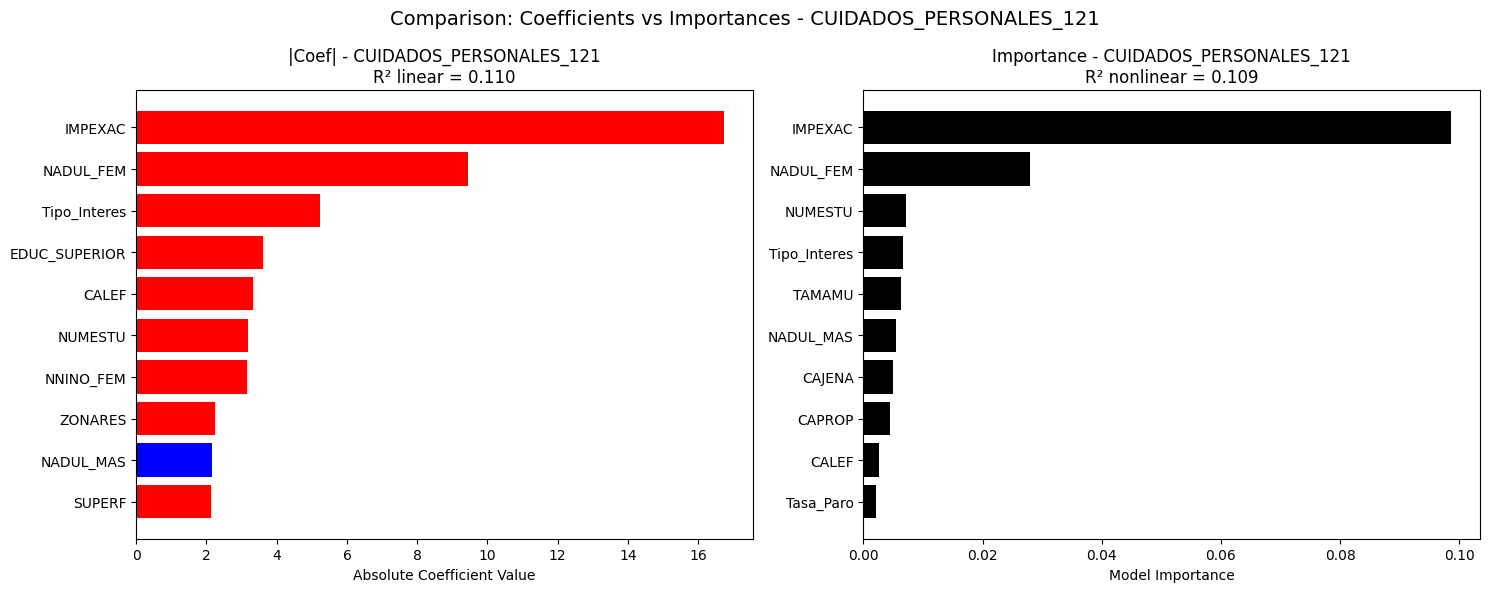

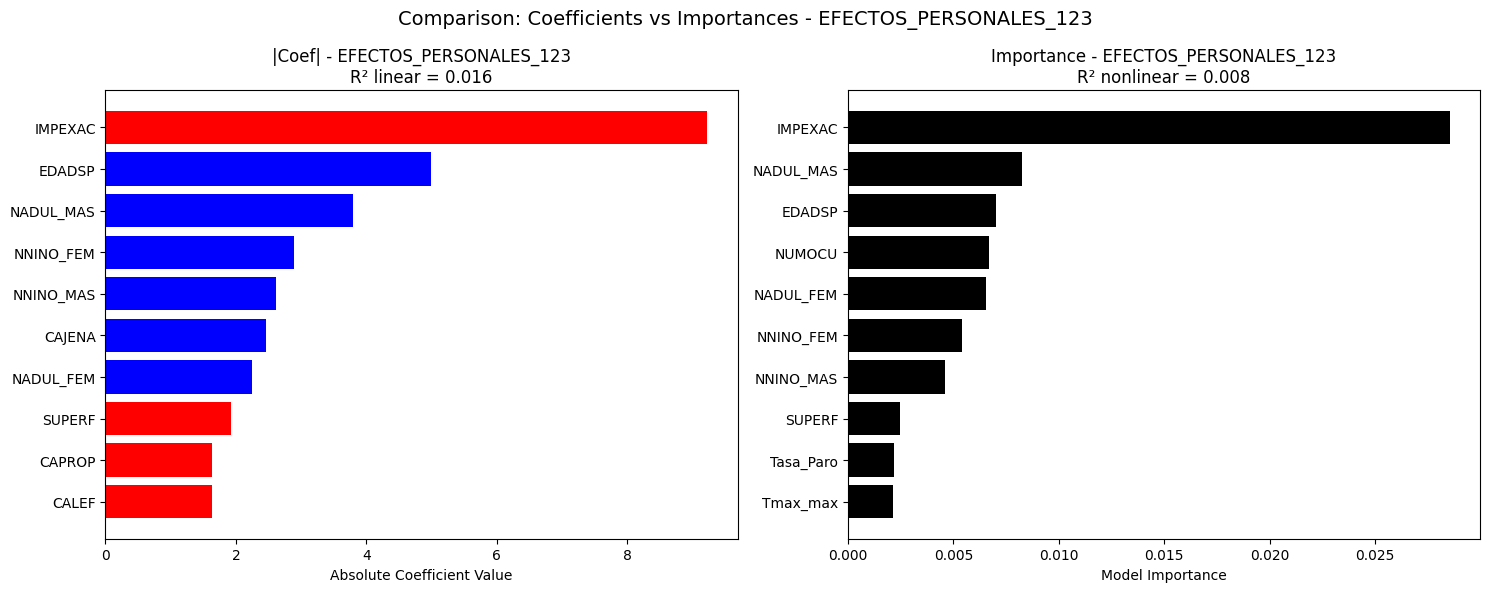

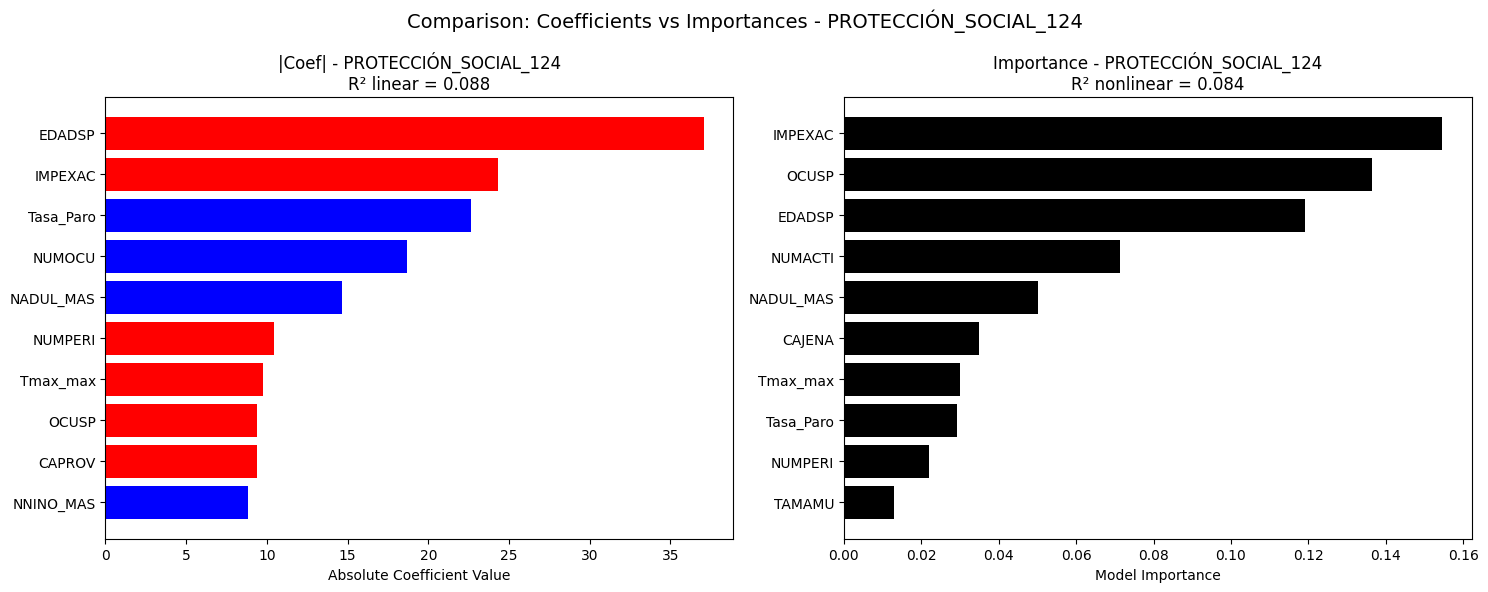

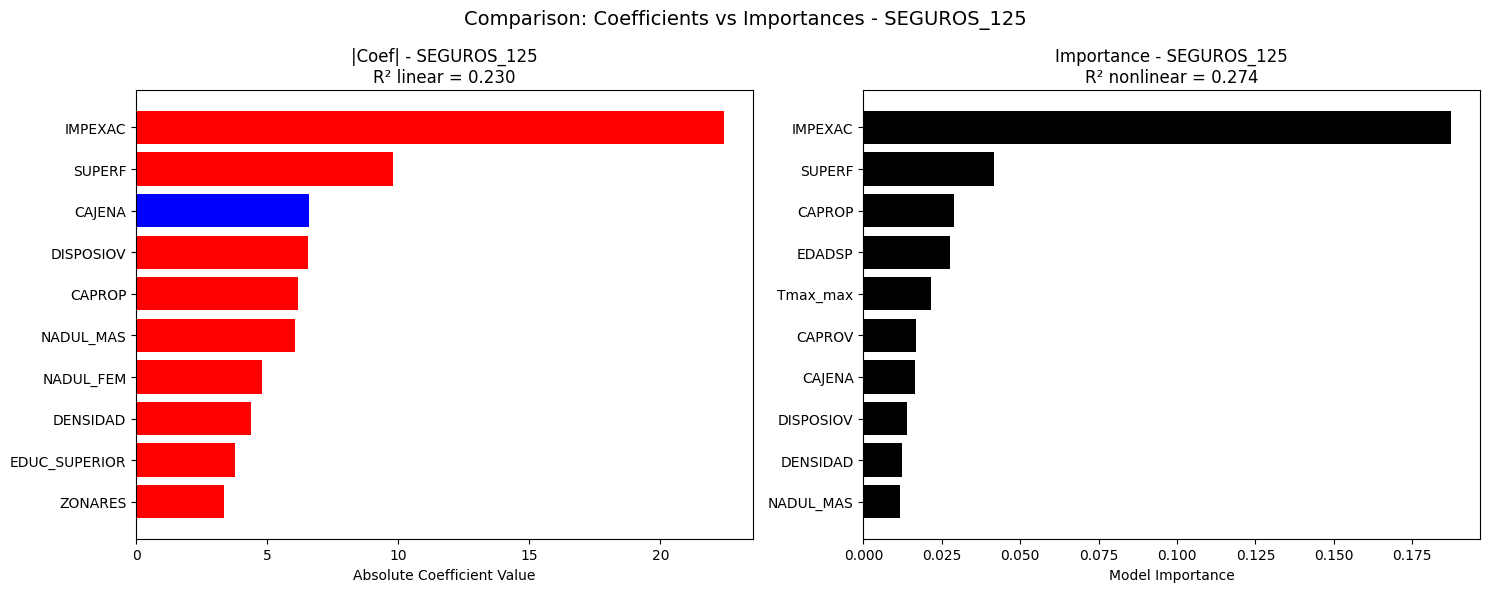

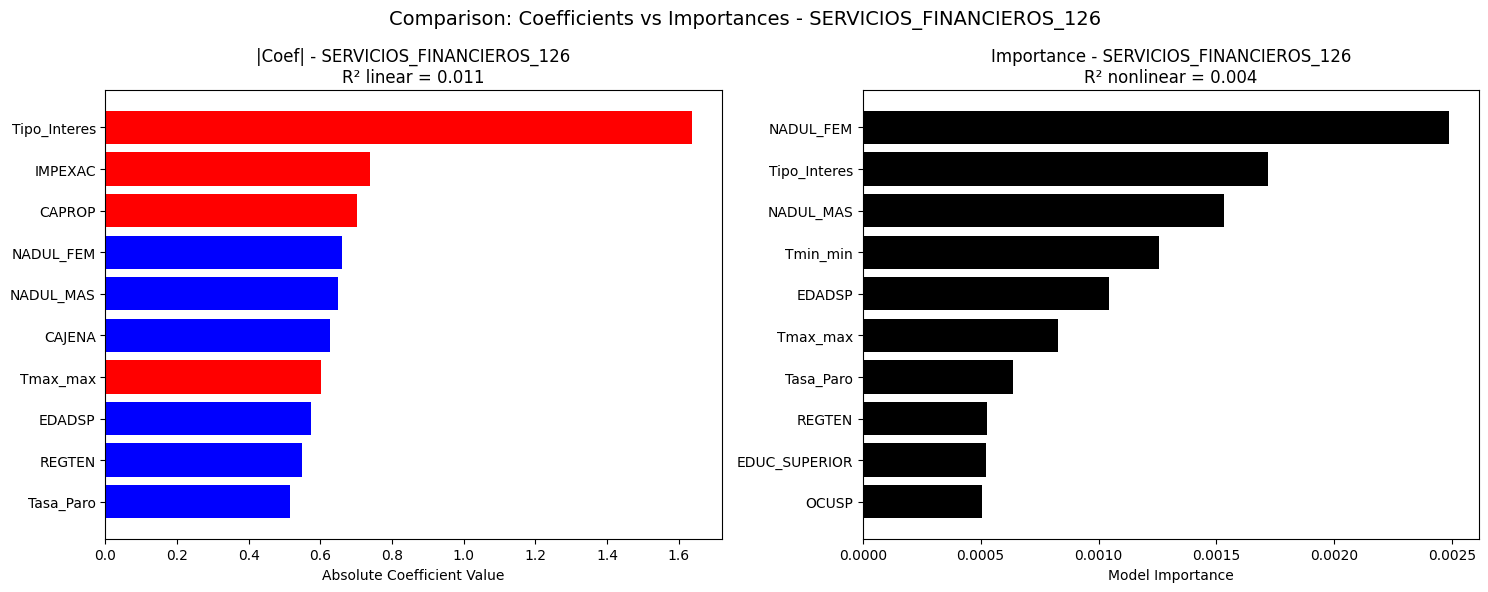

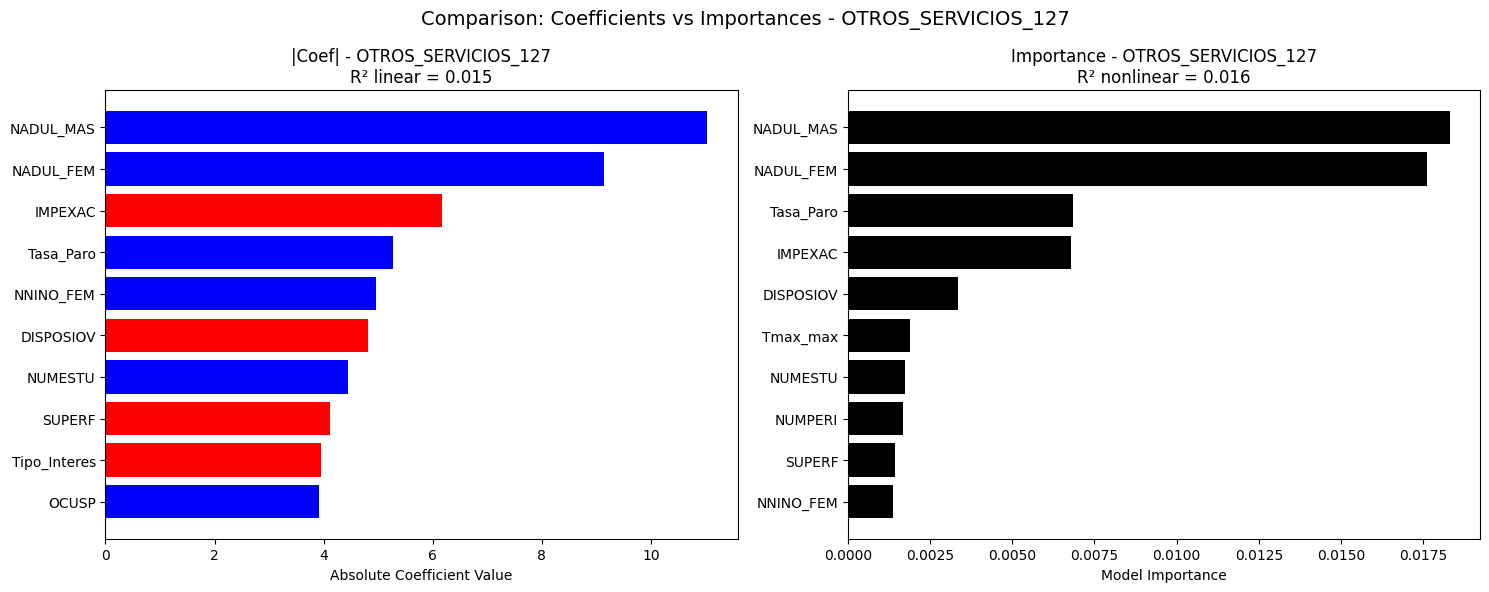

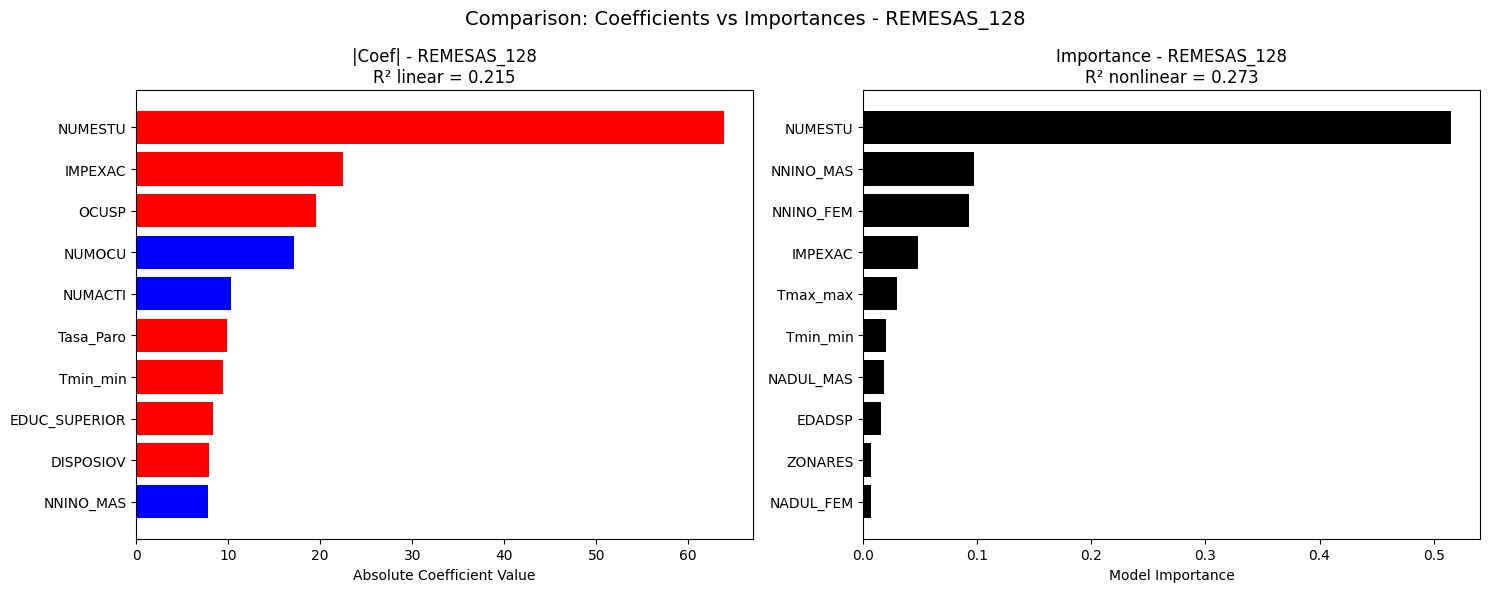

In [10]:
compare_coefficients_and_importances_with_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)

### Tabla comparativa de la métrica R2

In [11]:
metrics_lineal_df

Gasto        R²  R² Ajustado  \
0    ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42  0.649936     0.649880   
1                     SUMINISTRO_DE_AGUA_44  0.289541     0.289432   
2       ALQUILERES_REALES_DE_LA_VIVIENDA_41  0.286647     0.286273   
3    ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_45  0.277433     0.277323   
4                 PRODUCTOS_ALIMENTICIOS_11  0.244300     0.244185   
5                               SEGUROS_125  0.229673     0.229551   
6           EDUCACIÓN_INFANTIL_PRIMARIA_101  0.226581     0.225841   
7                 SERVICIOS_TELÉFONO_FAX_83  0.222536     0.222424   
8                               REMESAS_128  0.214995     0.213655   
9   EDUCACIÓN_SECUNDARIA_POSTSECUNDARIA_102  0.205044     0.204240   
10                   EDUCACIÓN_SUPERIOR_103  0.165139     0.164369   
11                         RESTAURACIÓN_111  0.155002     0.154849   
12                   PAQUETES_TURÍSTICOS_96  0.138389     0.137922   
13                          ALOJAMIENTO_112  0.122416     0.121995   
14                  CUIDADOS_PERSONALES_121  0.109523     0.109404   
15        BIENES_SERVICIOS_PARA_EL_HOGAR_56  0.105170     0.105054   
16                   COMPRA_DE_VEHÍCULOS_71  0.089713     0.088911   
17                    PROTECCIÓN_SOCIAL_124  0.088123     0.086762   
18                   ARTÍCULOS_DE_VESTIR_31  0.086373     0.086189   
19                BEBIDAS_NO_ALCOHÓLICAS_12  0.082328     0.082193   
20           USO_DE_VEHÍCULOS_PERSONALES_72  0.076477     0.076308   
21                  EDUCACIÓN_NO_FORMAL_104  0.077368     0.076159   
22                  EQUIPOS_TELÉFONO_FAX_82  0.073933     0.073595   
23               SERVICIOS_DE_TRANSPORTE_73  0.062741     0.062500   
24                               CALZADO_32  0.061932     0.061695   
25                      PRENSA_PAPELERÍA_95  0.059185     0.058956   
26               SERVICIOS_HOSPITALARIOS_63  0.058571     0.057076   
27                   BEBIDAS_ALCOHÓLICAS_21  0.041892     0.041715   
28                MUEBLES_REVESTIMIENTOS_51  0.036760     0.036485   
29              AUDIOVISUALES_TECNOLOGÍA_91  0.033681     0.033401   
30             GRANDES_ELECTRODOMÉSTICOS_53  0.033071     0.032866   
31               PRODUCTOS_FARMACÉUTICOS_61  0.032843     0.032649   
32      SERVICIOS_RECREATIVOS_CULTURALES_94  0.031153     0.030949   
33              OCIO_JARDINERÍA_MASCOTAS_93  0.028485     0.028271   
34                                TABACO_22  0.028062     0.027670   
35                    SERVICIOS_POSTALES_81  0.028323     0.027435   
36                TEXTILES_PARA_EL_HOGAR_52  0.020853     0.020396   
37              HERRAMIENTAS_CASA_JARDÍN_55  0.017152     0.016820   
38          MANTENIMIENTO_DE_LA_VIVIENDA_43  0.016773     0.016428   
39              BIENES_DURADEROS_DE_OCIO_92  0.016964     0.016243   
40                   EFECTOS_PERSONALES_123  0.015813     0.015538   
41                      OTROS_SERVICIOS_127  0.014954     0.014637   
42                  UTENSILIOS_DEL_HOGAR_54  0.014538     0.014225   
43        SERVICIOS_MÉDICOS_AMBULATORIOS_62  0.012044     0.011838   
44                SERVICIOS_FINANCIEROS_126  0.010839     0.010275   

             AIC           BIC  Nº Observaciones  
0   1.922283e+06  1.922520e+06            143826  
1   1.775994e+06  1.776255e+06            163428  
2   5.701455e+05  5.703444e+05             41977  
3   1.770167e+06  1.770427e+06            164172  
4   2.219736e+06  2.219996e+06            163789  
5   1.770484e+06  1.770743e+06            157854  
6   2.935244e+05  2.937186e+05             24084  
7   1.574723e+06  1.574962e+06            159545  
8   1.279288e+05  1.280585e+05              9981  
9   2.524505e+05  2.526253e+05             20770  
10  2.487916e+05  2.489324e+05             18454  
11  1.793087e+06  1.793322e+06            127277  
12  4.991816e+05  4.993796e+05             40596  
13  5.185212e+05  5.186930e+05             39701  
14  1.716812e+06  1.717021e+06            148786  
1

In [12]:
metrics_nonlineal_df

Target        R2
0    ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42  0.812002
1       ALQUILERES_REALES_DE_LA_VIVIENDA_41  0.700526
2                     SUMINISTRO_DE_AGUA_44  0.402763
3    ELECTRICIDAD_GAS_OTROS_COMBUSTIBLES_45  0.312963
4           EDUCACIÓN_INFANTIL_PRIMARIA_101  0.295631
5                               SEGUROS_125  0.273542
6                               REMESAS_128  0.273199
7                 PRODUCTOS_ALIMENTICIOS_11  0.269437
8                 SERVICIOS_TELÉFONO_FAX_83  0.261398
9   EDUCACIÓN_SECUNDARIA_POSTSECUNDARIA_102  0.210852
10        BIENES_SERVICIOS_PARA_EL_HOGAR_56  0.205275
11                   EDUCACIÓN_SUPERIOR_103  0.186383
12                         RESTAURACIÓN_111  0.172868
13                          ALOJAMIENTO_112  0.150232
14                   PAQUETES_TURÍSTICOS_96  0.147652
15                  CUIDADOS_PERSONALES_121  0.109181
16                  EDUCACIÓN_NO_FORMAL_104  0.097863
17                   COMPRA_DE_VEHÍCULOS_71  0.095642
18                   ARTÍCULOS_DE_VESTIR_31  0.091587
19                    PROTECCIÓN_SOCIAL_124  0.083636
20                BEBIDAS_NO_ALCOHÓLICAS_12  0.079087
21                  EQUIPOS_TELÉFONO_FAX_82  0.076902
22           USO_DE_VEHÍCULOS_PERSONALES_72  0.076830
23                      PRENSA_PAPELERÍA_95  0.072687
24               SERVICIOS_DE_TRANSPORTE_73  0.064467
25                               CALZADO_32  0.060524
26                                TABACO_22  0.059357
27                   BEBIDAS_ALCOHÓLICAS_21  0.058738
28              AUDIOVISUALES_TECNOLOGÍA_91  0.046097
29                MUEBLES_REVESTIMIENTOS_51  0.045156
30               PRODUCTOS_FARMACÉUTICOS_61  0.033763
31              OCIO_JARDINERÍA_MASCOTAS_93  0.030373
32             GRANDES_ELECTRODOMÉSTICOS_53  0.025129
33                    SERVICIOS_POSTALES_81  0.025069
34      SERVICIOS_RECREATIVOS_CULTURALES_94  0.024610
35                  UTENSILIOS_DEL_HOGAR_54  0.020270
36                TEXTILES_PARA_EL_HOGAR_52  0.020247
37              HERRAMIENTAS_CASA_JARDÍN_55  0.020208
38                      OTROS_SERVICIOS_127  0.016401
39          MANTENIMIENTO_DE_LA_VIVIENDA_43  0.014525
40              BIENES_DURADEROS_DE_OCIO_92  0.012350
41        SERVICIOS_MÉDICOS_AMBULATORIOS_62  0.009030
42                   EFECTOS_PERSONALES_123  0.007993
43               SERVICIOS_HOSPITALARIOS_63  0.004170
44                SERVICIOS_FINANCIEROS_126  0.003588

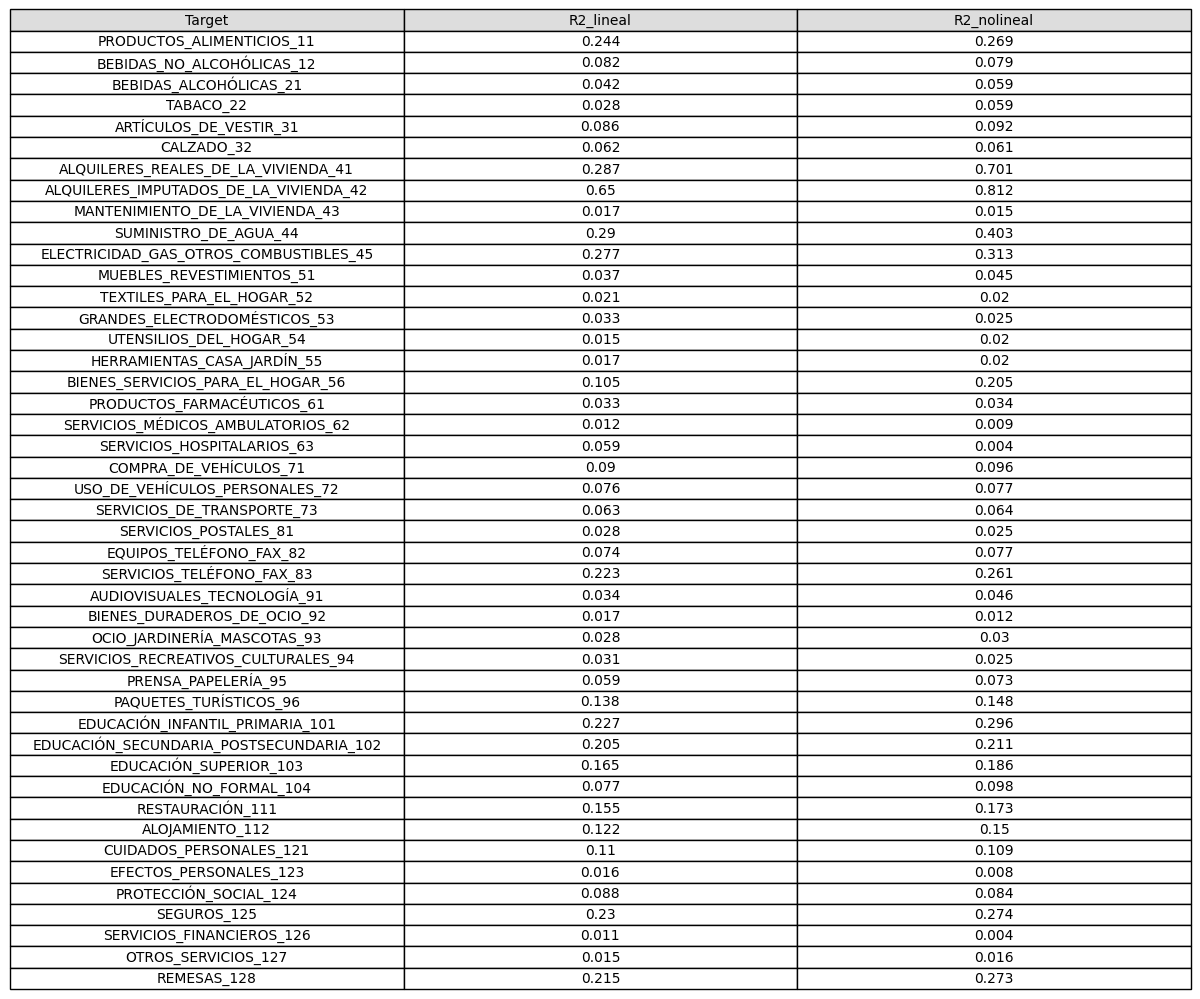

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df):
    # Fusionar ambos DataFrames por la columna correspondiente
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R²": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Extraer código numérico del Target
    merged["Codigo"] = merged["Target"].str.extract(r'_(\d+)$')[0].astype(int)

    # Ordenar por el código
    merged.sort_values(by="Codigo", inplace=True)

    # Eliminar columna auxiliar si no la quieres mostrar
    top = merged.drop(columns="Codigo")

    # Crear tabla visual
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    tabla = ax.table(
        cellText=top.round(3).values,
        colLabels=top.columns,
        loc='center',
        cellLoc='center',
        colColours=["#dddddd"] * 3
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df)

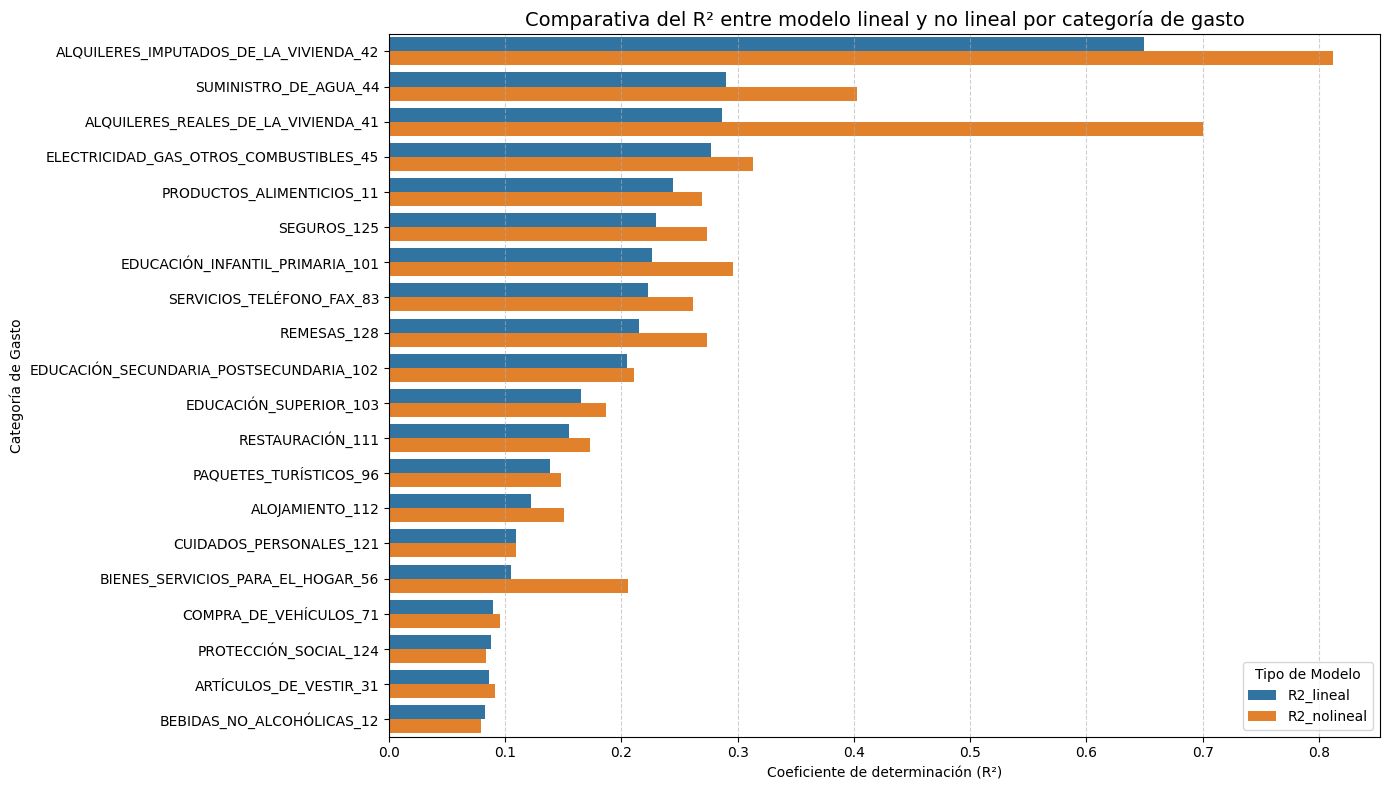

In [14]:
import seaborn as sns

def plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df, top_n=20):
    # Renombrar y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R²": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar por R² lineal
    merged.sort_values(by="R2_lineal", ascending=False, inplace=True)
    top = merged.head(top_n)

    # Convertir a formato largo para seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["R2_lineal", "R2_nolineal"],
                     var_name="Modelo", value_name="R²")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted, x="R²", y="Target", hue="Modelo")
    plt.title("Comparativa del R² entre modelo lineal y no lineal por categoría de gasto", fontsize=14)
    plt.xlabel("Coeficiente de determinación (R²)")
    plt.ylabel("Categoría de Gasto")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.legend(title="Tipo de Modelo")
    plt.tight_layout()
    plt.show()

plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df)

## Comparación del ajuste entre modelos lineales y no lineales

A continuación se resumen las principales conclusiones derivadas de la comparativa de R² entre los modelos lineales y no lineales para las diferentes categorías de gasto:

### 1. Mejor rendimiento del modelo no lineal en la mayoría de categorías
- En la gran mayoría de categorías analizadas, el modelo no lineal presenta valores de R² superiores al modelo lineal.
- Ejemplos destacados:
  - **ALQUILERES_REALES_DE_LA_VIVIENDA_41**: R² no lineal = 0.701 vs. lineal = 0.287
  - **SUMINISTRO_DE_AGUA_44**: R² no lineal = 0.403 vs. lineal = 0.290
  - **SERVICIOS_TELÉFONO_FAX_83**: R² no lineal = 0.261 vs. lineal = 0.223

Esto sugiere que el modelo no lineal es capaz de capturar relaciones complejas y no aditivas entre variables explicativas y el gasto.

### 2. Casos donde el modelo lineal rinde mejor
- Existen algunas pocas categorías donde el modelo lineal supera al no lineal:
  - **PRODUCTOS_FARMACÉUTICOS_61**: Lineal = 0.034 vs. No lineal = 0.033
  - **EFECTOS_PERSONALES_123**: Lineal = 0.016 vs. No lineal = 0.008
  - **SERVICIOS_FINANCIEROS_126**: Lineal = 0.011 vs. No lineal = 0.004

Estas diferencias son muy pequeñas, por lo que no invalidan la superioridad general del modelo no lineal.

### 3. Categorías con buen ajuste en ambos modelos
- Algunas partidas muestran un elevado ajuste tanto en su versión lineal como no lineal:
  - **ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42**: Lineal = 0.65 | No lineal = 0.812
  - **PRODUCTOS_ALIMENTICIOS_11**: Lineal = 0.244 | No lineal = 0.269
  - **SEGUROS_125**: Lineal = 0.230 | No lineal = 0.274

Esto indica que para ciertas categorías, incluso un modelo simple puede capturar una gran parte de la varianza del gasto.

### 4. Categorías con bajo poder explicativo
- Existen partidas con muy bajo R² en ambos modelos, lo que sugiere una alta variabilidad no explicada por las variables disponibles:
  - **SERVICIOS_HOSPITALARIOS_63**: Lineal = 0.059 | No lineal = 0.004
  - **HERRAMIENTAS_CASA_JARDÍN_55**: Lineal = 0.017 | No lineal = 0.020
  - **BIENES_DURADEROS_DE_OCIO_92**: Lineal = 0.017 | No lineal = 0.012

Esto puede deberse a que el gasto en estas categorías responde a factores impredecibles o externos al modelo, como decisiones discrecionales o eventos puntuales.

### 5. Conclusión general
El análisis muestra una clara mejora del poder predictivo cuando se emplean modelos no lineales, especialmente en categorías de gasto complejas o con interacciones entre variables explicativas. No obstante, para ciertas partidas el modelo lineal sigue siendo competitivo, lo que refuerza la importancia de adaptar la técnica al contexto de cada variable dependiente.
